<div class="alert alert-block alert-info">
<center> <h1>Customer segmentation (clustering) </h1> </center> <br>
<center> Hotel H client data </center>

<center>Group R </center>

#### Metadata:

- **ID**: Customer ID

- **Nationality**: Nationality of the customer in ISO 3166-1 (Alpha 3) format
- **Age**: The age of the customer
- **DaysSinceCreation**: Number of elapsed days since the customer was created
- **NameHash**: Hash of the customer's name
- **DocIDHash**: Hash of the customer’s personal document identification number (usually a passport or ID card)
- **AverageLeadTime**: Average number of days before arrival date the customer makes bookings
- **LodgingRevenue**: Total amount of lodging revenue paid by the customer so far
- **OtherRevenue**: Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far
- **BookingsCanceled**: Number of bookings the customer made but subsequently canceled 
- **BookingsNoShowed**: Number of bookings the customer made but subsequently made a "no-show"
- **BookingsCheckedin**: Number of bookings the customer made, which actually ended up staying
- **PersonNights**: Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking
- **RoomNights**: Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of-stay) of the booking
- **DistributionChannel**: Distribution channel normally used by the customer to make bookings at the hotel
- **MarketSegment**: Current market segment of the customer
- **SRHighFloor**: Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes)
- **SRLowFloor**: Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes)
- **SRAccessibleRoom**: Indication if the customer usually asks for an accessible room (0: No, 1: Yes)
- **SRMediumFloor**: Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes)
- **SRBathtub**: Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)
- **SRShower**: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)
- **SRCrib**: Indication if the customer usually asks for a crib (0: No, 1: Yes)
- **SRKingSizeBed**: Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes)
- **SRTwinBed**: Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes)
- **SRNearElevator**: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)
- **SRAwayFromElevator**: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)
- **SRNoAlcoholInMiniBar**: Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes)
- **SRQuietRoom**: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)


### Assignment:

1. Explore the data and identify the variables that should be used to segment customers
2. Use K-Means clustering to identify customers segments:
    - Justify your selection of K (taking into consideration the business use)
    - Use PCA to reduce dimensionality and speed-up model development
3. Suggest business applications for the findings

### Initial setup and modules/packages loading

In [1]:
!pip install yellowbrick

In [88]:
# Packages
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import cm
import seaborn as sns
from math import ceil
import category_encoders as ce
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
import warnings
warnings.filterwarnings("ignore")

# Source: professor's notebook

In [2]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

# Source: professor's notebook

In [3]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

# Source: professor's notebook

## Data understanding

In [4]:
# Load data 
ds = pd.read_csv("Case1_HotelCustomerSegmentation.csv", sep=";")

# Source: previous project notebook

In [5]:
ds.info()

# Source: previous project notebook

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    111733 non-null  int64  
 1   Nationality           111733 non-null  object 
 2   Age                   107561 non-null  float64
 3   DaysSinceCreation     111733 non-null  int64  
 4   NameHash              111733 non-null  object 
 5   DocIDHash             110732 non-null  object 
 6   AverageLeadTime       111733 non-null  int64  
 7   LodgingRevenue        111733 non-null  float64
 8   OtherRevenue          111733 non-null  float64
 9   BookingsCanceled      111733 non-null  int64  
 10  BookingsNoShowed      111733 non-null  int64  
 11  BookingsCheckedIn     111733 non-null  int64  
 12  PersonsNights         111733 non-null  int64  
 13  RoomNights            111733 non-null  int64  
 14  DistributionChannel   111733 non-null  object 
 15  

In [6]:
non_metric_features = ['Nationality', 'NameHash', 'DocIDHash', 'DistributionChannel', 'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']

# Source: previous project notebook

In [7]:
# Check if there are any strange values and count the values in each column for all non-metric features
for col in non_metric_features:
    print(ds[col].value_counts())
    print()

# Source: previous project notebook

Nationality
FRA    16516
DEU    14805
PRT    14101
GBR    11462
ESP     6123
       ...  
BHS        1
TMP        1
TZA        1
PNG        1
BDI        1
Name: count, Length: 199, dtype: int64

NameHash
0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51EF134B078B9D61A8CC4A    75
0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC9AA009C2BD78D31BBB63    30
0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A960AD7D9A7FB4EC61D02F    21
0xD32FF3D74C193EF22762853A9F3DFAE05172A9537CCA78A8D519372EB35BB910    20
0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D8787F8C7A413529295FD50    15
                                                                      ..
0x5A10B9327FB5DDC6415A75F4D34A888EC77A8E6BF26A3673C43F3EEFD93C9BC6     1
0x0E727EF33255C53456EB3B4180CE1F041AE58EAA7CA43A13CE7FD38DD4AB2B1C     1
0xF62DFF43A03E94F14864C756B7996436F09FE755A0443EC301467F1079153041     1
0xAF68558991D4F8C7315A850C73B76D49215FCC2C80E154CF585EEC598B711A91     1
0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2A6CCC2AAC27CF7326143

In [8]:
metric_features = [ 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights']

# Source: previous project notebook

In [9]:
# Check if there are any strange values and count the values in each column for all metric features
for col in metric_features:
    print(ds[col].value_counts())
    print()

# Source: previous project notebook

Age
51.0     2582
52.0     2561
55.0     2557
50.0     2504
54.0     2493
         ... 
115.0       2
123.0       1
97.0        1
110.0       1
95.0        1
Name: count, Length: 106, dtype: int64

DaysSinceCreation
502     298
522     247
108     234
312     234
137     232
       ... 
1377      5
1370      4
1363      4
763       3
1209      1
Name: count, Length: 1349, dtype: int64

AverageLeadTime
0      36678
1       2121
2       1271
6       1257
4       1224
       ...  
474        1
425        1
424        1
361        1
380        1
Name: count, Length: 424, dtype: int64

LodgingRevenue
0.00      33769
176.00      988
126.00      673
234.00      592
264.00      551
          ...  
605.10        1
846.16        1
421.68        1
391.28        1
173.55        1
Name: count, Length: 12689, dtype: int64

OtherRevenue
0.00       33552
42.00       3030
14.00       2913
28.00       2328
56.00       1723
           ...  
260.20         1
1319.00        1
61.90          1
613.79       

In [10]:
# Summary statistics for all variables
ds.describe(include='all').T

# Source: previous project notebook

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,111733.0,NaN,NaN,NaN,55867.0,32254.683151,1.0,27934.0,55867.0,83800.0,111733.0
Nationality,111733,199,FRA,16516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107561.0,NaN,NaN,NaN,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.0
DaysSinceCreation,111733.0,NaN,NaN,NaN,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.0
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,111733.0,NaN,NaN,NaN,60.833147,85.11532,-1.0,0.0,21.0,95.0,588.0
LodgingRevenue,111733.0,NaN,NaN,NaN,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.0
OtherRevenue,111733.0,NaN,NaN,NaN,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,NaN,NaN,NaN,0.002282,0.080631,0.0,0.0,0.0,0.0,15.0


In [11]:
# Check missing values
print(ds.isnull().sum())

# Source: previous project notebook

ID                         0
Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64


In [12]:
missing_percentage = (ds.isnull().sum().sum() / (ds.shape[0] * ds.shape[1])) * 100
print("Percentage of missing values:", missing_percentage, "%")

Percentage of missing values: 0.159647830403576 %


## Data visualization 

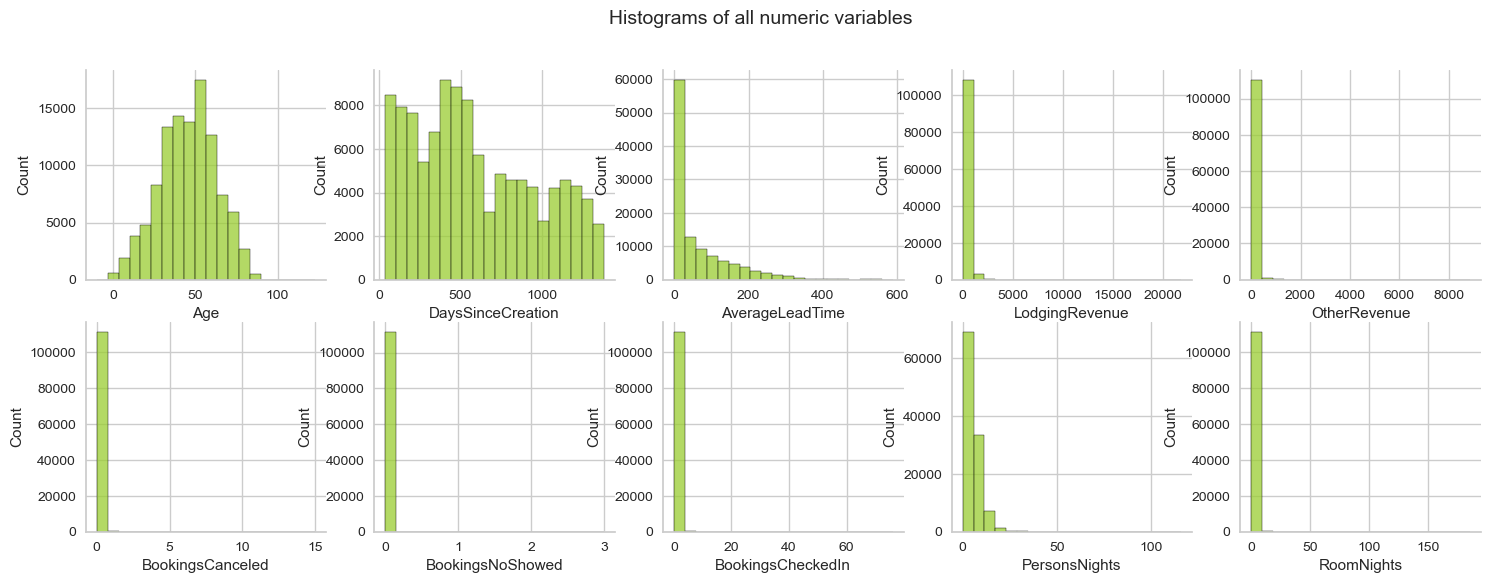

In [13]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(ds[metric_features], ax.flatten()):
    g = sns.histplot(data=ds,
                bins=20,
                 x=var,
                 ax=subplot,
                 color="yellowgreen",
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms of all numeric variables", fontsize=plots_Title_fontSize);

# Source: professor's notebook

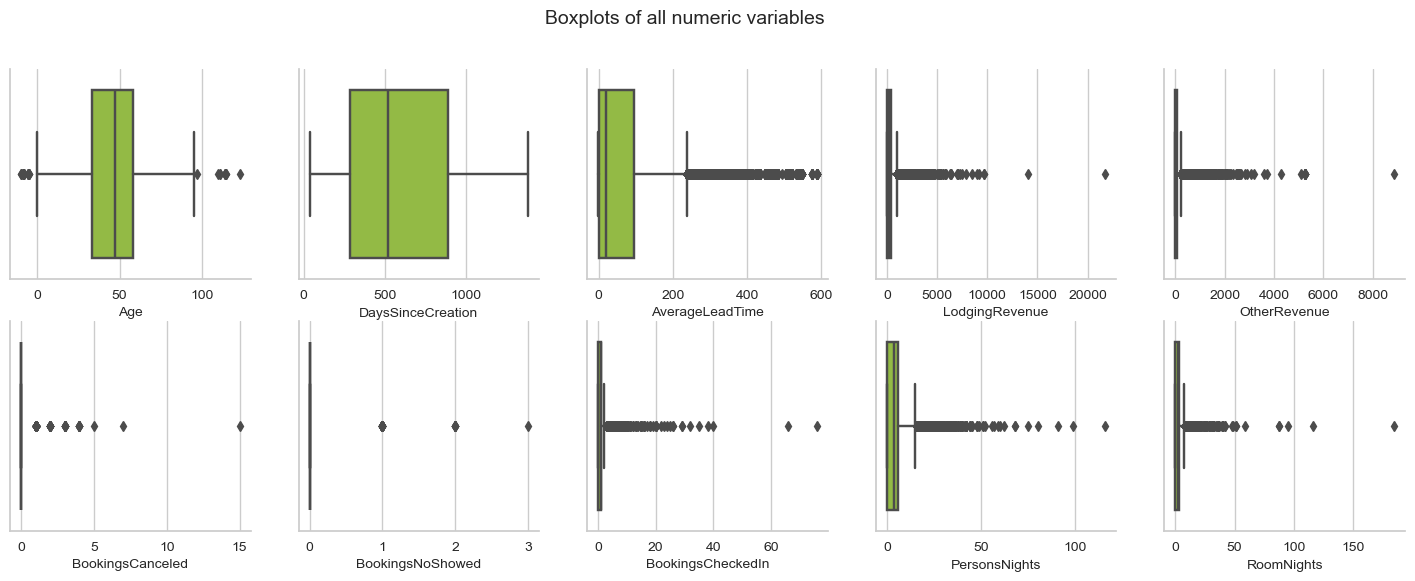

In [14]:
# BOXPLOT (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(ds[metric_features], ax.flatten()):
    g = sns.boxplot(data=ds,
                 x=var,
                 ax=subplot,
                 color="yellowgreen")

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

# Source: professor's notebook

- There is no evidence of linear relationships between features.
- Confirms the existence of outliers.

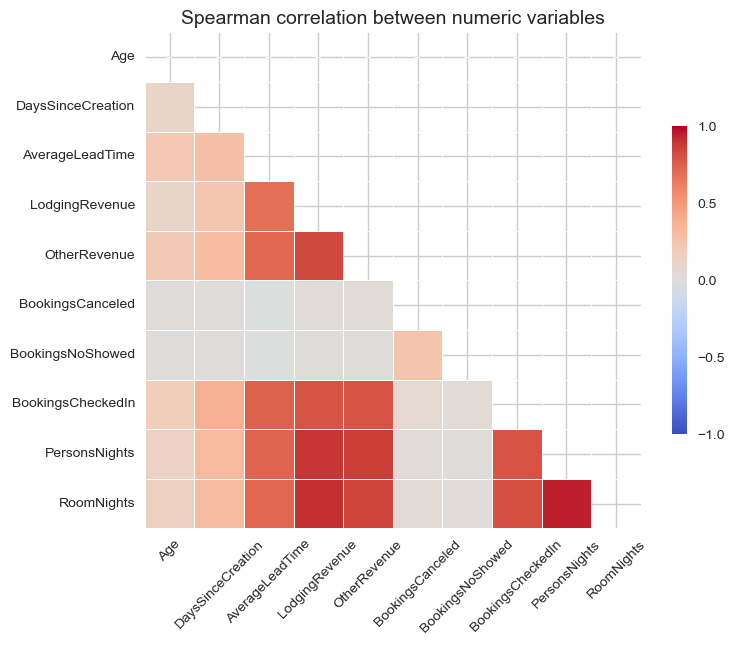

In [15]:
# CORRELATION 

# Create correlation matrix
corr = ds[metric_features].corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

# Draw
fig , ax = plt.subplots(figsize=(8, 10))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.4f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize})

# Decoration
plt.title("Spearman correlation between numeric variables", fontsize=plots_Title_fontSize)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# Source: professor's notebook

## Data preparation

In [16]:
data_prep = ds.copy()

# Source: previous project notebook

In [17]:
# Check missing values
print(data_prep.isnull().sum())

# Source: previous project notebook

ID                         0
Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64


- We decide to remove the rows lacking DocIDHash because without it, we cannot verify whether these records belong to already registered customers, as the DocIDHash is crucial for such confirmation (two people can have the same name but are indeed different clients). Furthermore, they represent only a few records.

In [18]:
data_prep.dropna(subset=['DocIDHash'], inplace=True)

#Source: chatgpt

 - There are instances of negative values in the Age column, which are not plausible (it is impossible to be negative years old). Given that this issue affects only 14 records, we have chosen to remove them from our dataset.

In [19]:
data_prep.drop(data_prep[data_prep['Age'] < 0].index, inplace=True)

#Source: chatgpt

- The AverageLeadTime variable represents the average number of days before the arrival date that customers make bookings. However, we have identified instances where the AverageLeadTime is listed as -1, which is not feasible. As this occurs only in 12 records we opt to exclude them from our dataset. 

In [20]:
data_prep.drop(data_prep[data_prep['AverageLeadTime'] < 0].index, inplace=True)

#Source: chatgpt

In [21]:
data_prep["DocIDHash"].value_counts()

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    3031
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      31
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      24
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      15
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      14
                                                                      ... 
0xE2DE2CEC3055541AB53A676CF68A8B24C242469F1C28727FEFC367915005A499       1
0xAB045E047D8A55B4D716694D62625A261E06C1E6ECDE7A384016208923B0FFA2       1
0x422B61504483A6C19C77B51B139EED1785CFB115E935898791225C7BDF2F2848       1
0x3145902C3456FA75313DEA14A55054EF46AF6A019AB1284AB2AD78B42F93EFF4       1
0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7CE438BCBA07BB1012304       1
Name: count, Length: 103454, dtype: int64

- There is a DOCIDHash that is 3031 times repeated. It is probably used for business needs (used as default when needed to input or correct information in the system) and does not correspond to a real customer. For this reason, it does not hold value for our analysis and we opt to drop it from the dataset.

In [22]:
# Filter rows where 'DocIDHash' is not equal to '0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855' 
#Because number duplicates
data_prep = data_prep[data_prep['DocIDHash'] != '0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855']

#Source: chatgpt

- MarketSegment corresponds to a classification given by the hotel according to its current customer segmentation strategy/criteria. Since we are developing a new customer segmentation plan, this classification is not relevant for the project. We decide to drop it from the dataset. 

In [23]:
data_prep = data_prep.drop(['MarketSegment'], axis=1)

#Source: chatgpt

In [24]:
data_prep.shape

# Source: previous project notebook

(107674, 28)

#### Handling Duplicate Records

- There are records with the same Nationality, DocIDHash and NameHash which leads us to believe they correspond to the same customer. Our goal is to consolidate this scattered data into a single profile for each client, ensuring a comprehensive overview of their information minimizing bias in our analysis.

In [25]:
df_copy = data_prep.copy()

# Source: previous project notebook

In [26]:
# how many rows have the same "DocIDHash" and "NameHash" and "Nationality"
df_copy[df_copy.duplicated(subset=['DocIDHash', "NameHash", "Nationality"], keep=False)]

# Source: chatgpt

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
30,31,PRT,40.0,1385,0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...,0xC3A4B390B366380E10ECEE8B00DBCF8EE466E474CC1B...,1,1083.5,255.49,0,...,0,0,0,0,1,0,0,0,0,0
32,33,PRT,42.0,1385,0xCD370C60479B203E6EAA61BC39625A89AF23FD5644AB...,0x9685D374CBB94779513634BF0111DC9C2750F6BBC1B1...,0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
35,36,PRT,64.0,1385,0x2892853ACDE4F91C8DB84FF2FB21F65B83180956A75C...,0xA46A1032FC70B0836182BC3166E4CFAB334F9CD82120...,0,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0
122,123,PRT,42.0,1384,0x13F3ADE170EB89A77D2382F53F46AB6F508114BC8F4C...,0x7DECF4D79050842C98BC061E9FC77F6EC1042B1A41F2...,2,404.5,473.30,0,...,0,0,0,1,1,0,0,0,0,0
402,403,FRA,39.0,1379,0x151534153AD90C917F2ECC4969626BEA37E66E0F85C3...,0xBDF406844F5C6F19839DEA4A9EF9B5496B5D4E2D07CC...,20,219.0,52.50,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111322,111323,LUX,8.0,40,0x855D1540E591F6640709E8BB6F6BE26F04EBEBD3510F...,0x6CF7256E1B20F60DA11D590BF376C205A10D23FA68B1...,0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
111343,111344,FRA,75.0,40,0x1441D0635E3493605030DEA783DAC8B924A3EE9A7298...,0x46AF3DF631BB4FA041D897E43A1679FD8F77E3793B6C...,0,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
111351,111352,FRA,54.0,39,0x05ACC2AEB73F8A40BCDF90175DE9935D36F8D6632E60...,0x769F23C18265E2D8B03CE2EC6F6124C5BD000EE63198...,0,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
111571,111572,PRT,35.0,38,0x87E907A2D43E25D3E3D56D7016D9447D4D646CCD7CFE...,0x4AAF782C86F1B4F015C85E005271AF3FAF25AEA6DFF6...,2,113.0,12.00,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# drop ID column
df_copy = df_copy.drop(["ID"], axis=1)

# Source: chatgpt

- It might useful for our analysis to know the first and the last contact of each customer with the hotel. For that we create two new features: "LastVisit" corresponds to the number of elapsed days since the most recent visit and "FirstVisit" corresponds to the number of elapsed days since the first record.

In [28]:
#create column "LastVisit" and "FirstVisit"
df_copy["LastVisit"]=df_copy["DaysSinceCreation"]
df_copy["FirstVisit"]=df_copy["DaysSinceCreation"]
#drop "DaysSinceCreation"
df_copy = df_copy.drop(["DaysSinceCreation"], axis=1)

# Source: chatgpt

- In order to merge the information regarding the same customer in one single profile, we apply the following criteria:
    - The value in "Age" should be the median of the values in all rows
    - The values in "LastVisit" and "FirstVisit" correspond to the highest and lowest value, respectively, in DaysSinceCreation
    - The "AverageLeadTime" should be the mean of the values in all records
    - "LodgingRevenue" and "OtherRevenue" are summed in order to get the total amound paid by each customer
    - "BookingsCanceled", "BookingsNoShowed" and "BookingsCheckedIn" are summed to get the total bookings in each category
    - "PersonsNights" and "RoomNights" are summed to get the total of each feature
    - "DistributionChannel" should correspond to the one of the most recent record
    - The Special Requests should be registered according to the most recent booking of each client

In [29]:
def most_recent(x):
    return x.sort_values().iloc[0]

# Group by "DocIDHash", "NameHash", and "Nationality", and aggregate columns
df_copy = df_copy.groupby(["Nationality","DocIDHash", "NameHash"]).agg({
    "Age": "median",
    "LastVisit": "max",
    "FirstVisit": "min",
    "AverageLeadTime": "mean",
    "LodgingRevenue": "sum",
    "OtherRevenue": "sum",
    "BookingsCanceled": "sum",
    "BookingsNoShowed": "sum",
    "BookingsCheckedIn": "sum",
    "DistributionChannel": most_recent,
    "PersonsNights": "sum",
    "RoomNights": "sum", 
    "SRHighFloor": most_recent,
    "SRCrib": most_recent,
    "SRKingSizeBed": most_recent,
    "SRTwinBed": most_recent,
    "SRAwayFromElevator": most_recent,
    "SRQuietRoom": most_recent,
}).reset_index()

# Source: chatgpt

In [30]:
#check missing values
missing_values = df_copy.isnull().sum()
missing_values

# Source: previous project notebook

Nationality              0
DocIDHash                0
NameHash                 0
Age                    299
LastVisit                0
FirstVisit               0
AverageLeadTime          0
LodgingRevenue           0
OtherRevenue             0
BookingsCanceled         0
BookingsNoShowed         0
BookingsCheckedIn        0
DistributionChannel      0
PersonsNights            0
RoomNights               0
SRHighFloor              0
SRCrib                   0
SRKingSizeBed            0
SRTwinBed                0
SRAwayFromElevator       0
SRQuietRoom              0
dtype: int64

#### Deal with Missing Values

In [31]:
data_preparation = df_copy.copy()

# Source: previous project notebook

In [32]:
# count the missing values
data_preparation.isna().sum()

# Source: previous project notebook

Nationality              0
DocIDHash                0
NameHash                 0
Age                    299
LastVisit                0
FirstVisit               0
AverageLeadTime          0
LodgingRevenue           0
OtherRevenue             0
BookingsCanceled         0
BookingsNoShowed         0
BookingsCheckedIn        0
DistributionChannel      0
PersonsNights            0
RoomNights               0
SRHighFloor              0
SRCrib                   0
SRKingSizeBed            0
SRTwinBed                0
SRAwayFromElevator       0
SRQuietRoom              0
dtype: int64

In [33]:
#percentage missing values
missing_percentage = (data_preparation.isnull().sum().sum() / (data_preparation.shape[0] * data_preparation.shape[1])) * 100
print("Percentage of missing values:", missing_percentage, "%")

#Source: chatgpt

Percentage of missing values: 0.013589080741863822 %


- The missing values in Age seem to be missing at random. To fill them in, we will use the KNN Imputer. 

In [35]:
# Instantiate the KNNImputer
imputer = KNNImputer()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weighting strategy
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=imputer, param_grid=param_grid, scoring=silhouette_score, cv=5)

# Extract 'Age' column and convert it to numpy array
X = data_preparation['Age'].values.reshape(-1, 1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X)

# Get the best estimator
best_imputer = grid_search.best_estimator_

# Now, you can use the best imputer to fill missing values in the 'Age' column
data_preparation['Age'] = best_imputer.fit_transform(X)

# Print the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

#Source: chatgpt

Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}


In [36]:
# count the missing values
data_preparation.isna().sum()

# Source: previous project notebook

Nationality            0
DocIDHash              0
NameHash               0
Age                    0
LastVisit              0
FirstVisit             0
AverageLeadTime        0
LodgingRevenue         0
OtherRevenue           0
BookingsCanceled       0
BookingsNoShowed       0
BookingsCheckedIn      0
DistributionChannel    0
PersonsNights          0
RoomNights             0
SRHighFloor            0
SRCrib                 0
SRKingSizeBed          0
SRTwinBed              0
SRAwayFromElevator     0
SRQuietRoom            0
dtype: int64

#### Deal with Outliers 

- It is important to deal with outliers in order to ensure that the clustering algorithm can accurately identify the underlying patterns in the data and produce meaningful and reliable results.

In [37]:
data_out = data_preparation.copy() 

In [38]:
# Summary statistics for all variables
data_out.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nationality,104776,199,FRA,16273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,104776,103453,0x1B16B1DF538BA12DC3F97EDBB85CAA7050D46C148134...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NameHash,104776,104109,0x264D8DC78C198A35ED647032AC1EBEBC70D4BB9F64F2...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,104776.0,NaN,NaN,NaN,45.601247,17.274976,0.0,33.0,46.0,58.0,123.0
LastVisit,104776.0,NaN,NaN,NaN,588.575208,372.465512,36.0,283.0,515.0,880.0,1385.0
FirstVisit,104776.0,NaN,NaN,NaN,584.670631,372.097397,36.0,276.0,512.0,876.0,1385.0
AverageLeadTime,104776.0,NaN,NaN,NaN,61.954952,85.521494,0.0,0.0,23.0,97.0,588.0
LodgingRevenue,104776.0,NaN,NaN,NaN,294.544622,401.00373,0.0,0.0,218.0,406.0,21981.0
OtherRevenue,104776.0,NaN,NaN,NaN,66.816159,126.454646,0.0,0.0,33.0,87.5,8859.25
BookingsCanceled,104776.0,NaN,NaN,NaN,0.002214,0.105106,0.0,0.0,0.0,0.0,15.0


In [39]:
metric_features = [ 'Age', 'FirstVisit', 'LastVisit', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights','RoomNights']

In [40]:
non_metric_features = ['Nationality', 'NameHash', 'DocIDHash', 'DistributionChannel' , 'SRHighFloor', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRAwayFromElevator', 'SRQuietRoom', 'Age_Group', 'LodgingRevenueGroup', 'OtherRevenueGroup']

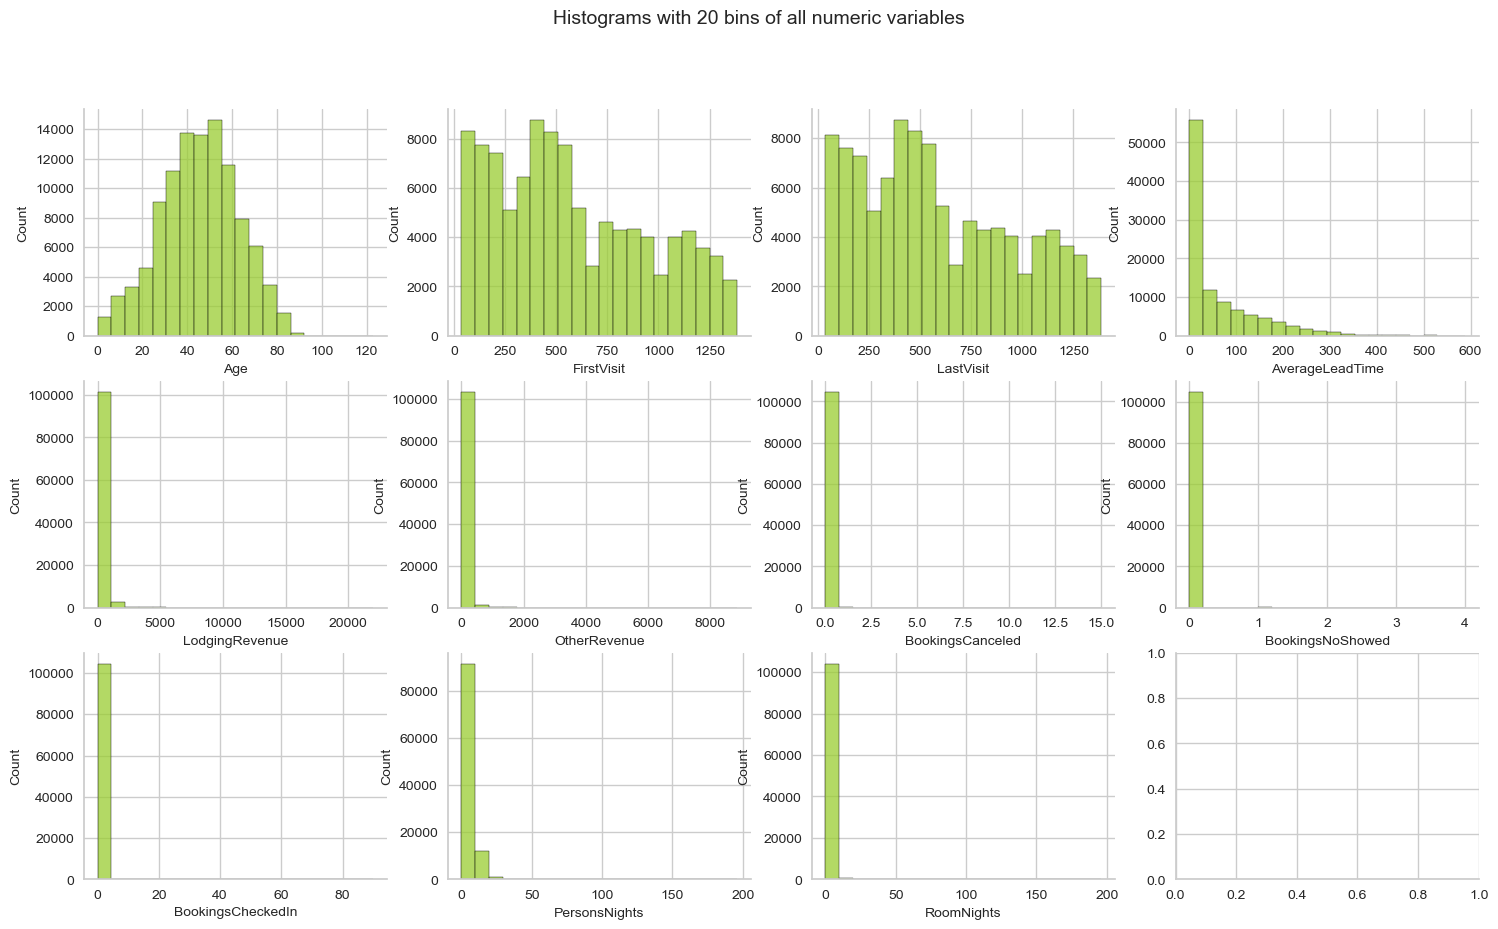

In [41]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(3, 4, figsize=(18,10))
for var, subplot in zip(data_out[metric_features], ax.flatten()):
    g = sns.histplot(data=data_out,
                bins=20,
                 x=var,
                 ax=subplot,
                 color = "yellowgreen",
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms with 20 bins of all numeric variables", fontsize=plots_Title_fontSize);

# Source: professor's notebook

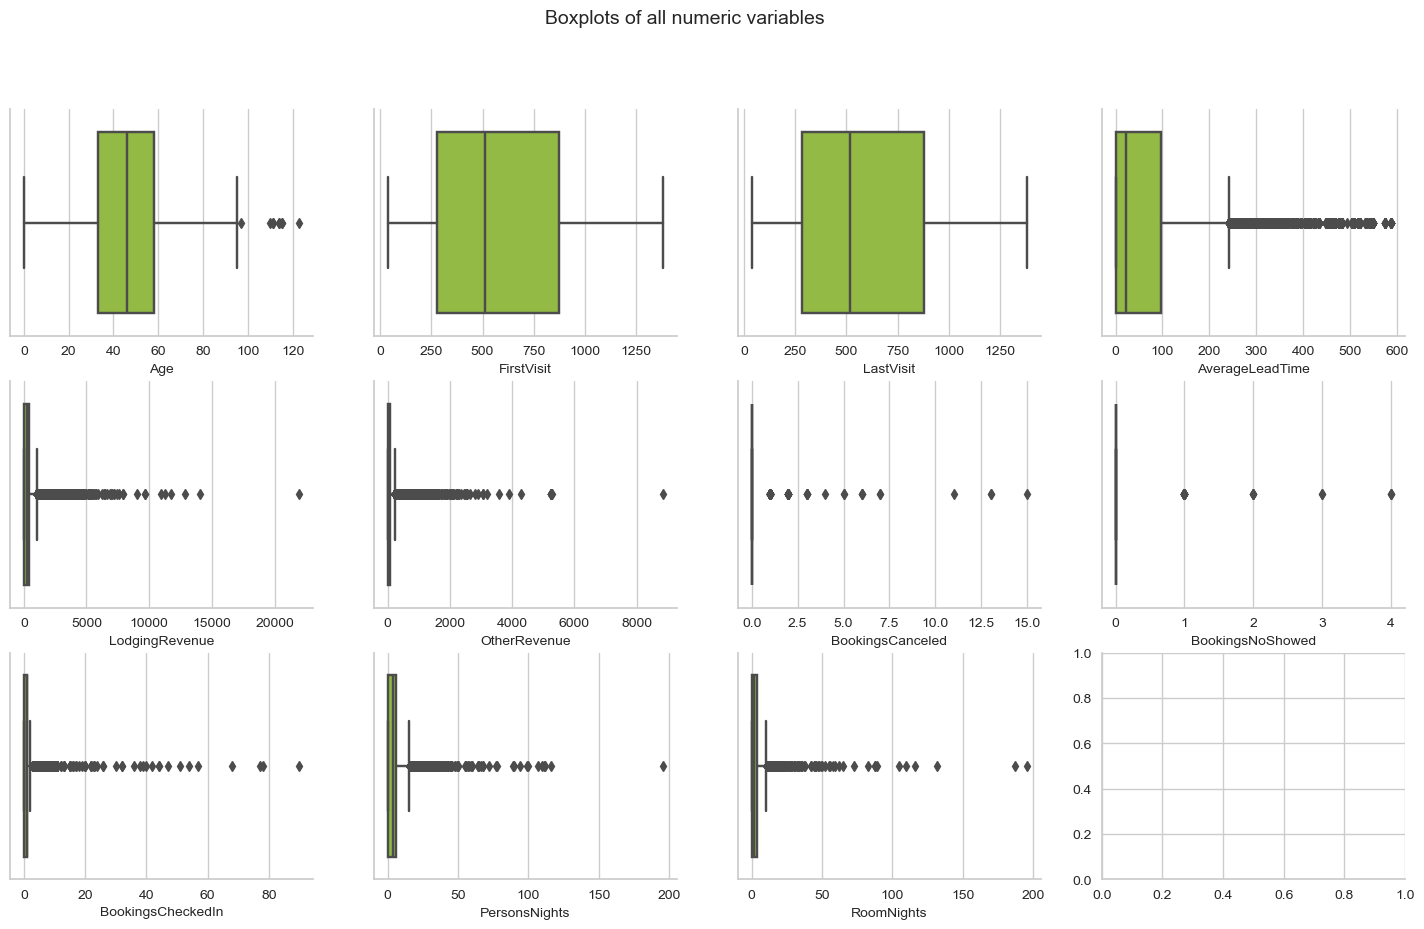

In [42]:
# BOXPLOT (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(3, 4, figsize=(18,10))
for var, subplot in zip(data_out[metric_features], ax.flatten()):
    g = sns.boxplot(data=data_out,
                 x=var,
                 ax=subplot,
                 color = "yellowgreen")

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

# Source: professor's notebook

- We will cap the outliers by establishing thresholds based on the distribution of data as observed in histograms and boxplots of the features. The extreme values are replaced with values at the threshold to mitigate their impact on the clustering process. This approach ensures that the clustering algorithm operates on a more representative and stable dataset, reflecting the main patterns observed in the majority of the data distribution.

In [43]:
# Define maximum threshold values
max_age = 100
max_alt = 366
max_lodging_revenue = 4500
max_other_revenue = 2000
max_bookings_canceled = 10
max_bookings_checked_in = 60
max_persons_nights = 50

# Replace outliers in respective columns and count affected records per feature
affected_age = (data_out['Age'] > max_age).sum()
affected_alt = (data_out['AverageLeadTime'] > max_alt).sum()
affected_lodging_revenue = (data_out['LodgingRevenue'] > max_lodging_revenue).sum()
affected_other_revenue = (data_out['OtherRevenue'] > max_other_revenue).sum()
affected_bookings_canceled = (data_out['BookingsCanceled'] > max_bookings_canceled).sum()
affected_bookings_checked_in = (data_out['BookingsCheckedIn'] > max_bookings_checked_in).sum()
affected_persons_nights = (data_out['PersonsNights'] > max_persons_nights).sum()

# Display the count of affected records per feature
print("Number of affected records for Age:", affected_age)
print("Number of affected records for Average Lead Time:", affected_alt)
print("Number of affected records for LodgingRevenue:", affected_lodging_revenue)
print("Number of affected records for OtherRevenue:", affected_other_revenue)
print("Number of affected records for BookingsCanceled:", affected_bookings_canceled)
print("Number of affected records for BookingsCheckedIn:", affected_bookings_checked_in)
print("Number of affected records for PersonsNights:", affected_persons_nights)

#Source: chatgpt

Number of affected records for Age: 8
Number of affected records for Average Lead Time: 1010
Number of affected records for LodgingRevenue: 55
Number of affected records for OtherRevenue: 39
Number of affected records for BookingsCanceled: 4
Number of affected records for BookingsCheckedIn: 4
Number of affected records for PersonsNights: 28


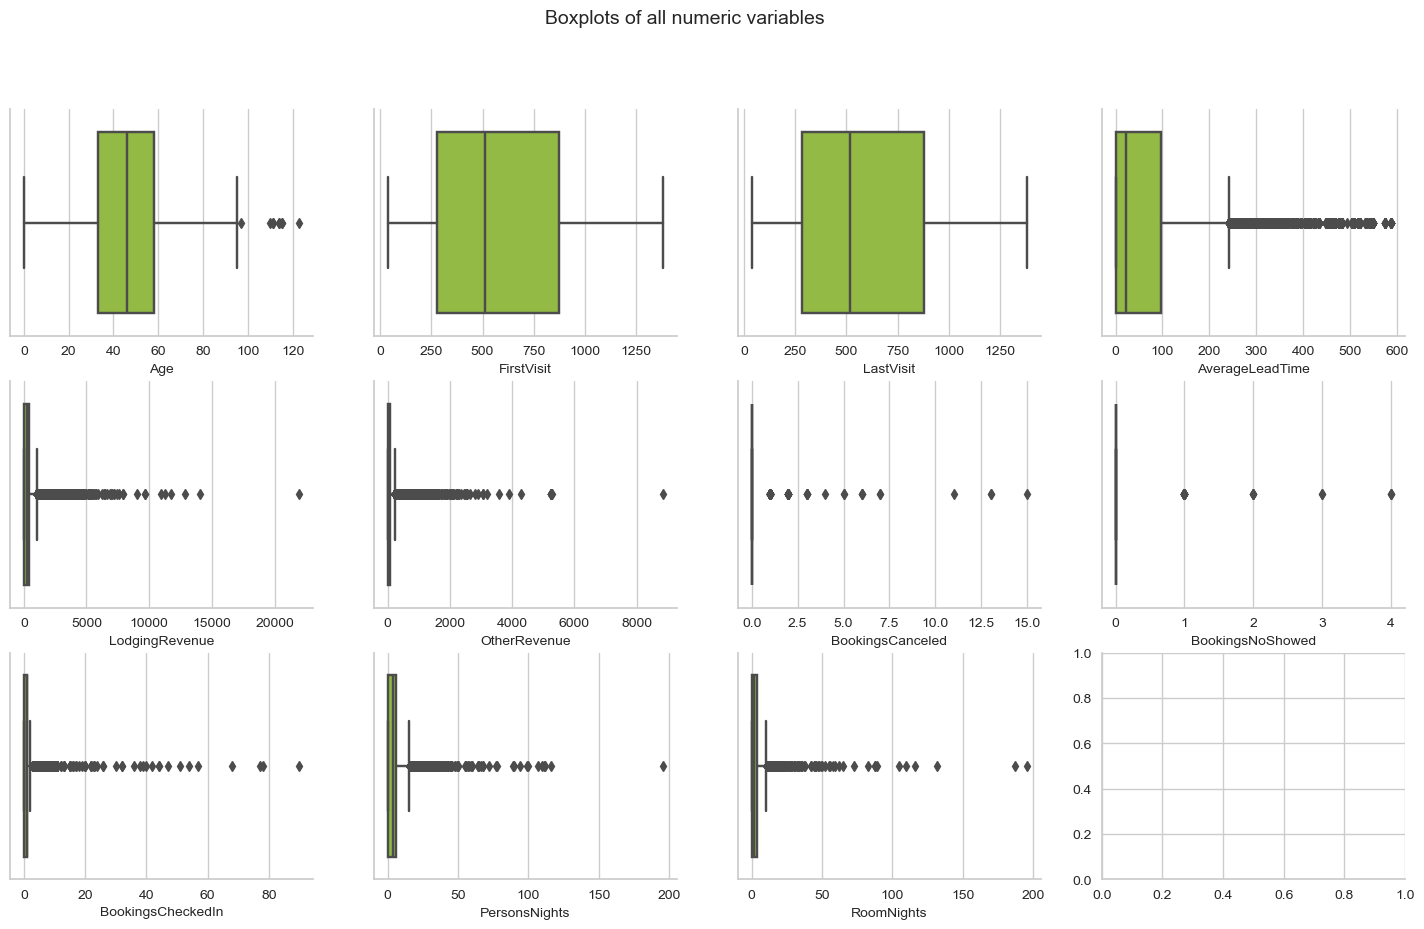

In [44]:
# BOXPLOT (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(3, 4, figsize=(18,10))
for var, subplot in zip(data_out[metric_features], ax.flatten()):
    g = sns.boxplot(data=data_out,
                 x=var,
                 color="yellowgreen",
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

# Source: professor's notebook

### Visualizations after preprocessing

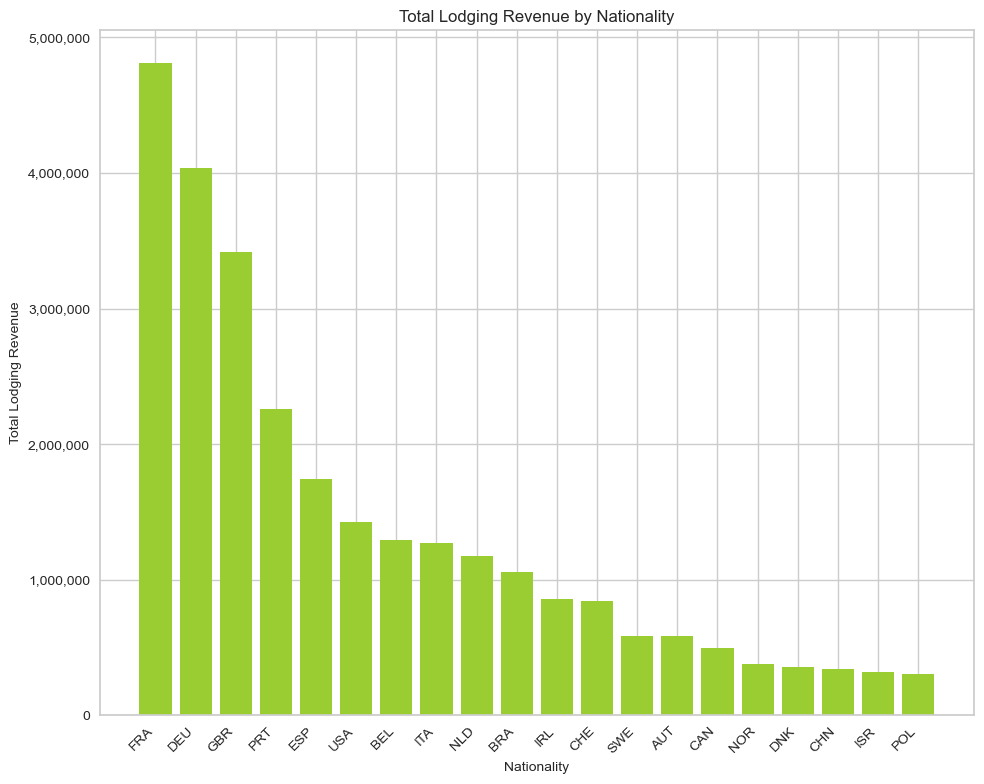

In [45]:
# Aggregate the total lodging revenue by nationality
nationality_revenue = data_out.groupby('Nationality')['LodgingRevenue'].sum().sort_values(ascending=False)

# For a more manageable plot, you might want to limit the number of nationalities displayed. Here, we take the top 20:
top_nationalities = nationality_revenue.head(20)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed
bar_positions = np.arange(len(top_nationalities))

ax.bar(bar_positions, top_nationalities, color='yellowgreen')

# Set up labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(top_nationalities.index, rotation=45, ha='right')  # Rotate labels to prevent overlap
ax.set_xlabel('Nationality')
ax.set_ylabel('Total Lodging Revenue')
ax.set_title('Total Lodging Revenue by Nationality')

# Optionally, you can add a format to the y-axis to make it more readable, e.g., currency
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))
)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

# Source: chatgpt

- predominant european countries

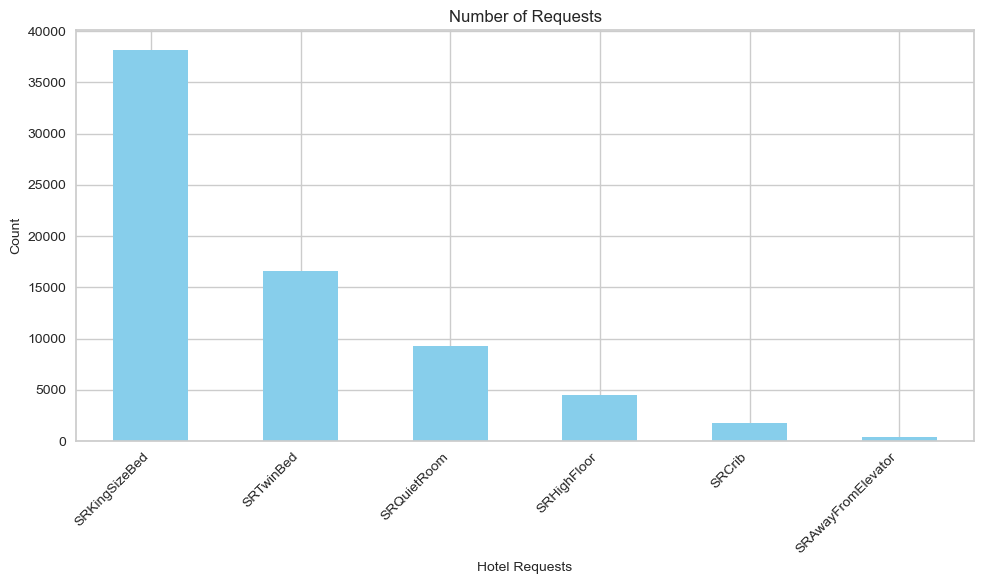

In [46]:
# Filter columns with 'SR' in their name
requests = [col for col in data_out.columns if 'SR' in col]

# Count the number of occurrences of 1 in each column
counts = data_out[requests].eq(1).sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')

# Set up labels and title
plt.xlabel('Hotel Requests')
plt.ylabel('Count')
plt.title('Number of Requests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

#Source: chatgpt

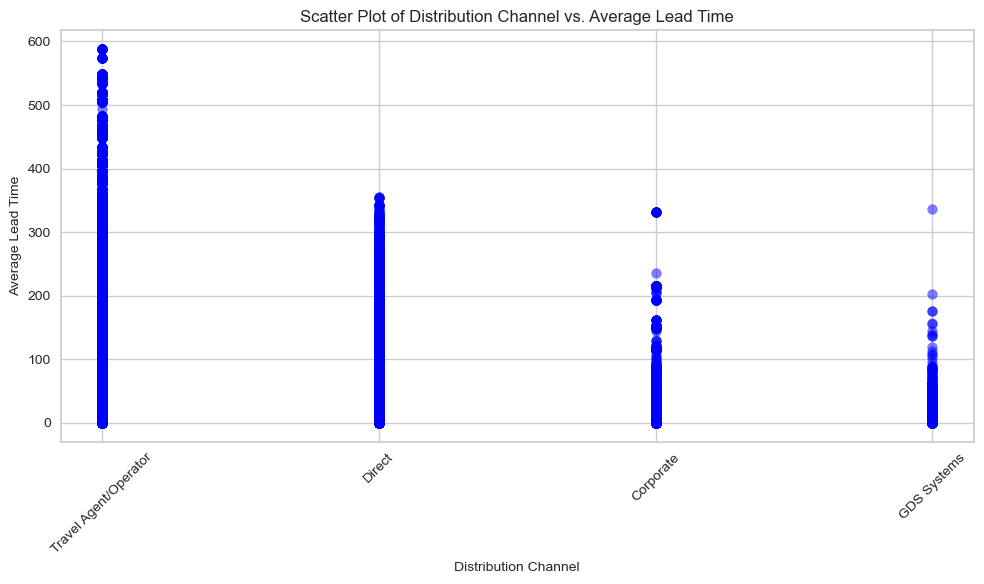

In [47]:
# Extracting the data
distribution_channel = data_out['DistributionChannel']
average_lead_time = data_out['AverageLeadTime']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(distribution_channel, average_lead_time, alpha=0.5, color='blue')

# Adding labels and title
plt.title('Scatter Plot of Distribution Channel vs. Average Lead Time')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Lead Time')

# Adjusting x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Showing plot
plt.grid(True)
plt.tight_layout()
plt.show()

#Source: chatgpt

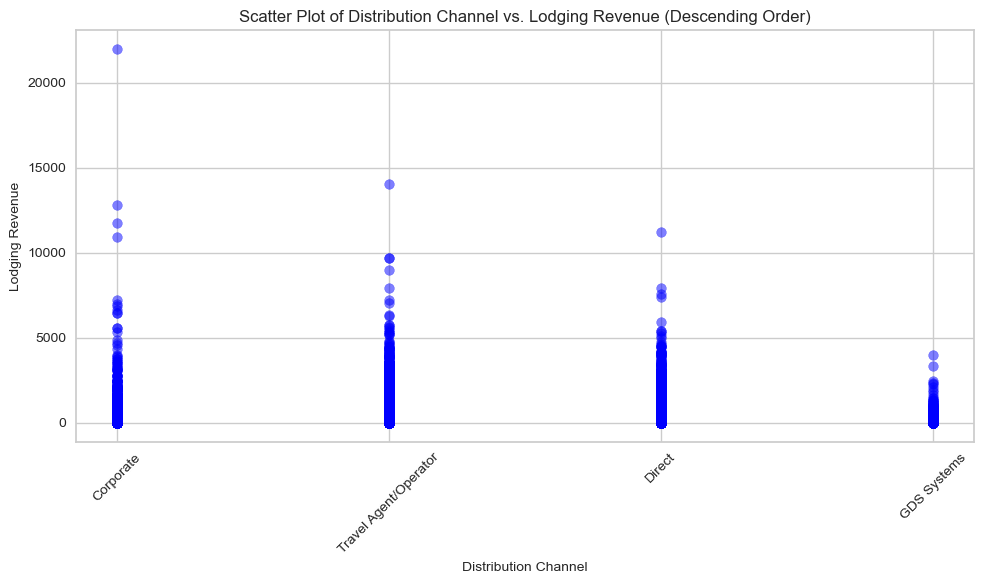

In [48]:
# Sort the DataFrame by LodgingRevenue in descending order
sorted = data_out.sort_values(by='LodgingRevenue', ascending=False)

# Extracting the sorted data
distribution_channel = sorted['DistributionChannel']
revenue = sorted['LodgingRevenue']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(distribution_channel, revenue, alpha=0.5, color='blue')

# Adding labels and title
plt.title('Scatter Plot of Distribution Channel vs. Lodging Revenue (Descending Order)')
plt.xlabel('Distribution Channel')
plt.ylabel('Lodging Revenue')

# Adjusting x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Showing plot
plt.grid(True)
plt.tight_layout()
plt.show()

#Source: chatgpt

In [49]:
data_out[(data_out['DistributionChannel'] == 'Corporate') & (data_out['LodgingRevenue'] > 20000)]

#Source: chatgpt

,Nationality,DocIDHash,NameHash,Age,LastVisit,FirstVisit,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,BookingsCheckedIn,DistributionChannel,PersonsNights,RoomNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRAwayFromElevator,SRQuietRoom
94902,PRT,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,45.601247,1315,1058,34.0,21981.0,1616.0,1,...,30,Corporate,64,187,0,0,0,0,0,0


In [50]:
data_out[(data_out['LodgingRevenue'] > 10000)]

#Source: chatgpt

,Nationality,DocIDHash,NameHash,Age,LastVisit,FirstVisit,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,BookingsCheckedIn,DistributionChannel,PersonsNights,RoomNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRAwayFromElevator,SRQuietRoom
32974,DNK,0x2A6FECFD6B318B51F4F36EED34DB84A319E2FDBEFDE6...,0x9AC9D968FD7FED7A9AF8C5763BCAE6D8CC64882D70E9...,51.000000,83,83,160.000000,14044.80,2891.5,0,...,1,Travel Agent/Operator,24,12,0,0,0,0,0,0
79795,NAM,0xC4127C74660B177E942FA518811B0BFB4A896C411319...,0x2D3570AEC4B5754E98DC1BD1391B8C6BB2E1F2C3840A...,63.000000,734,730,5.000000,11224.00,1330.5,1,...,4,Direct,24,12,0,0,0,0,0,0
87488,PRT,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,48.000000,1323,42,34.066667,11740.65,3066.5,5,...,90,Corporate,112,132,0,0,1,0,0,0
91903,PRT,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A9...,51.000000,693,142,16.300000,12819.85,2025.2,6,...,78,Corporate,196,196,0,0,1,0,0,0
91911,PRT,0xA48B0F2B83B929D4DF2A5D500C7183589B76FE2BD99F...,0x6861798B833BA46BE0D4F429B6D8A894E4D2719F6930...,59.000000,1323,1140,62.000000,10928.00,874.0,1,...,17,Corporate,50,48,0,0,0,0,0,0
94902,PRT,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,45.601247,1315,1058,34.000000,21981.00,1616.0,1,...,30,Corporate,64,187,0,0,0,0,0,0


In [51]:
# Calculate the average LodgingRevenue for Corporate distribution channel
avg_lodging_revenue_corporate = data_out[data_out['DistributionChannel'] == 'Corporate']['LodgingRevenue'].mean()

# Calculate the average LodgingRevenue for Travel Agent distribution channel
avg_lodging_revenue_travel_agent = data_out[data_out['DistributionChannel'] == 'Travel Agent']['LodgingRevenue'].mean()

# Compare the averages
if avg_lodging_revenue_corporate > avg_lodging_revenue_travel_agent:
    print("Corporate spends more on average for LodgingRevenue.")
elif avg_lodging_revenue_corporate < avg_lodging_revenue_travel_agent:
    print("Travel Agent spends more on average for LodgingRevenue.")
else:
    print("Both Corporate and Travel Agent spend the same on average for LodgingRevenue.")

#Source: chatgpt

Both Corporate and Travel Agent spend the same on average for LodgingRevenue.


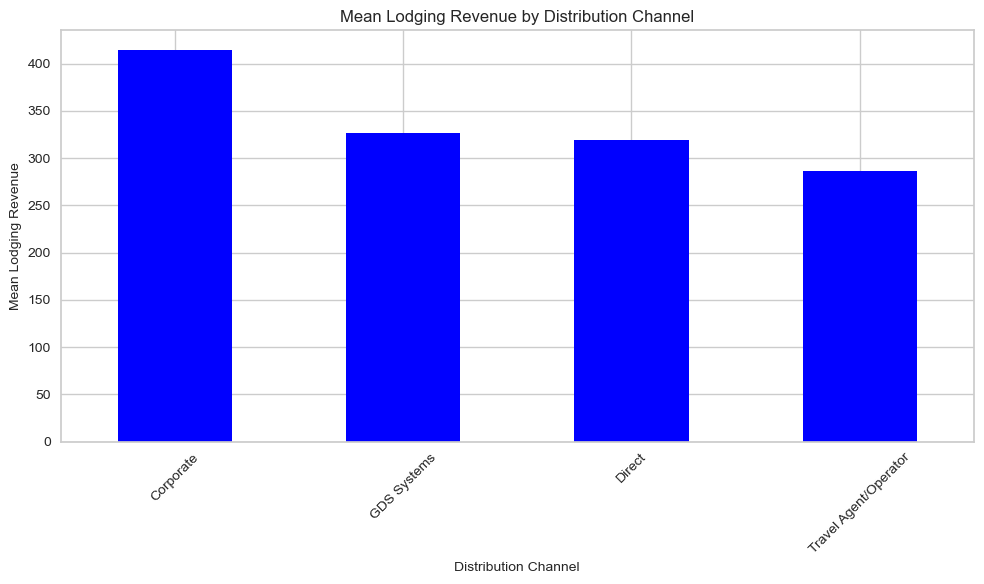

In [52]:
# Grouping the data by DistributionChannel and calculating the mean of LodgingRevenue
revenue_by_channel = data_out.groupby('DistributionChannel')['LodgingRevenue'].mean()

# Sorting the data in descending order
revenue_by_channel_sorted = revenue_by_channel.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
revenue_by_channel_sorted.plot(kind='bar', color='blue')

# Adding labels and title
plt.title('Mean Lodging Revenue by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Mean Lodging Revenue')

# Adding grid lines
plt.grid(axis='y')

# Showing plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Source: chatgpt

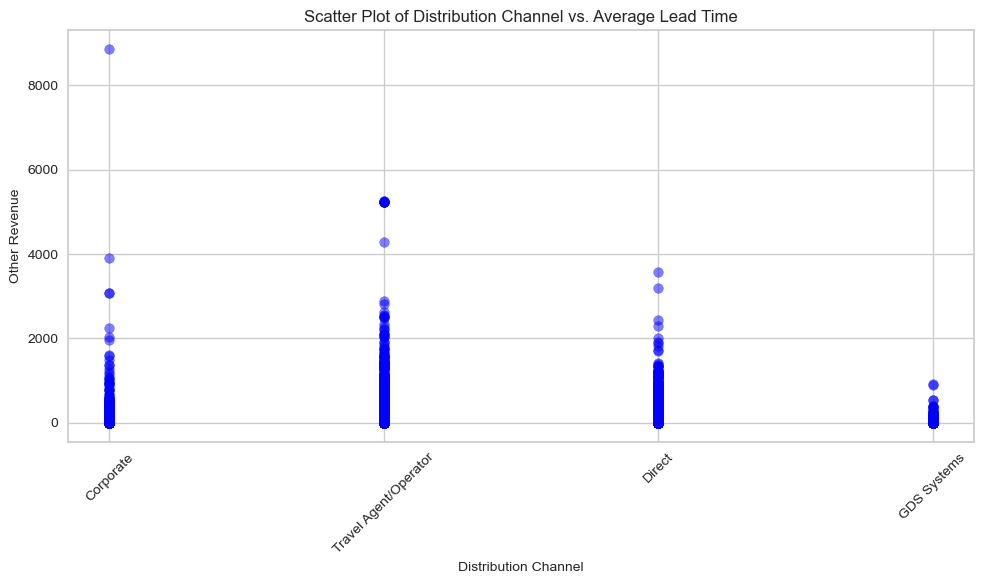

In [53]:
# Sortiving Values
sorted_other = data_out.sort_values(by='OtherRevenue', ascending=False)

# Extracting the data
distribution_channel = sorted_other['DistributionChannel']
revenue= sorted_other['OtherRevenue']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(distribution_channel, revenue, alpha=0.5, color='blue')

# Adding labels and title
plt.title('Scatter Plot of Distribution Channel vs. Average Lead Time')
plt.xlabel('Distribution Channel')
plt.ylabel('Other Revenue')

# Adjusting x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Showing plot
plt.grid(True)
plt.tight_layout()
plt.show()

#Source: chatgpt

In [54]:
# Calculate the average OtherRevenue for Corporate distribution channel
avg_other_revenue_corporate = data_out[data_out['DistributionChannel'] == 'Corporate']['OtherRevenue'].mean()

# Calculate the average OtherRevenue for Travel Agent distribution channel
avg_other_revenue_travel_agent = data_out[data_out['DistributionChannel'] == 'Travel Agent']['OtherRevenue'].mean()

# Compare the averages
if avg_other_revenue_corporate > avg_other_revenue_travel_agent:
    print("Corporate spends more on average for OtherRevenue.")
elif avg_other_revenue_corporate < avg_other_revenue_travel_agent:
    print("Travel Agent spends more on average for OtherRevenue.")
else:
    print("Both Corporate and Travel Agent spend the same on average for OtherRevenue.")

#Source: chatgpt

Both Corporate and Travel Agent spend the same on average for OtherRevenue.


#### Feature Transformation/ Engineering

In [55]:
data_changes = data_out.copy()

In [56]:
data_changes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nationality,104776,199,FRA,16273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,104776,103453,0x1B16B1DF538BA12DC3F97EDBB85CAA7050D46C148134...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NameHash,104776,104109,0x264D8DC78C198A35ED647032AC1EBEBC70D4BB9F64F2...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,104776.0,NaN,NaN,NaN,45.601247,17.274976,0.0,33.0,46.0,58.0,123.0
LastVisit,104776.0,NaN,NaN,NaN,588.575208,372.465512,36.0,283.0,515.0,880.0,1385.0
FirstVisit,104776.0,NaN,NaN,NaN,584.670631,372.097397,36.0,276.0,512.0,876.0,1385.0
AverageLeadTime,104776.0,NaN,NaN,NaN,61.954952,85.521494,0.0,0.0,23.0,97.0,588.0
LodgingRevenue,104776.0,NaN,NaN,NaN,294.544622,401.00373,0.0,0.0,218.0,406.0,21981.0
OtherRevenue,104776.0,NaN,NaN,NaN,66.816159,126.454646,0.0,0.0,33.0,87.5,8859.25
BookingsCanceled,104776.0,NaN,NaN,NaN,0.002214,0.105106,0.0,0.0,0.0,0.0,15.0


In [57]:
data_changes.columns

Index(['Nationality', 'DocIDHash', 'NameHash', 'Age', 'LastVisit',
       'FirstVisit', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'DistributionChannel', 'PersonsNights', 'RoomNights', 'SRHighFloor',
       'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRAwayFromElevator',
       'SRQuietRoom'],
      dtype='object')

In [58]:
# Convert the "Age_Median" column to integers
data_changes["Age"] = data_changes["Age"].astype(int)

# Display the values of the "Age_Median" column after conversion
print(data_changes["Age"])

#Source: chatgpt

0         30
1         49
2         52
3         30
4         38
          ..
104771    14
104772    45
104773    75
104774    49
104775    36
Name: Age, Length: 104776, dtype: int32


- We are not going to include people under the age of 18 in our customer segmentation analysis as they are not the target of the Hotel's marketing strategy.

In [59]:
#Remove customers who are minors as we cannot make marketing campaigns directly to them
data_changes = data_changes.drop(data_changes[data_changes['Age'] < 18].index)

#Source: chatgpt

- We created a new column indicating the continent of origin for each customer based on their country of residence.

In [60]:
# Dictionary mapping countries to continents
country_continent_dict = {
    'PRT': 'Europe', 'DEU': 'Europe', 'FRA': 'Europe', 'JPN': 'Asia', 'IRL': 'Europe', 'ESP': 'Europe', 'BEL': 'Europe',
    'NLD': 'Europe', 'AUT': 'Europe', 'ITA': 'Europe', 'CHN': 'Asia', 'RUS': 'Europe', 'POL': 'Europe', 'USA': 'North America',
    'HUN': 'Europe', 'CRI': 'North America', 'MEX': 'North America', 'CHE': 'Europe', 'ROU': 'Europe', 'GBR': 'Europe',
    'BIH': 'Europe', 'BRA': 'South America', 'FIN': 'Europe', 'AGO': 'Africa', 'CAN': 'North America', 'ZAF': 'Africa',
    'TWN': 'Asia', 'GRC': 'Europe', 'AUS': 'Oceania', 'ISR': 'Asia', 'BGR': 'Europe', 'SAU': 'Asia', 'SWE': 'Europe',
    'ARG': 'South America', 'ARM': 'Asia', 'CHL': 'South America', 'MAR': 'Africa', 'MOZ': 'Africa', 'KOR': 'Asia',
    'TUN': 'Africa', 'DNK': 'Europe', 'NOR': 'Europe', 'MYS': 'Asia', 'EGY': 'Africa', 'IND': 'Asia', 'HRV': 'Europe',
    'CPV': 'Africa', 'JOR': 'Asia', 'COD': 'Africa', 'DZA': 'Africa', 'LUX': 'Europe', 'TUR': 'Asia', 'IRN': 'Asia',
    'LBY': 'Africa', 'PAN': 'North America', 'COL': 'South America', 'VEN': 'South America', 'GNB': 'Africa', 'CZE': 'Europe',
    'AND': 'Europe', 'SVN': 'Europe', 'PER': 'South America', 'ATF': 'Antarctica', 'UGA': 'Africa', 'AZE': 'Asia',
    'NZL': 'Oceania', 'LTU': 'Europe', 'SRB': 'Europe', 'EST': 'Europe', 'KAZ': 'Asia', 'KWT': 'Asia', 'IDN': 'Asia',
    'UKR': 'Europe', 'SVK': 'Europe', 'MLI': 'Africa', 'ARE': 'Asia', 'BGD': 'Asia', 'THA': 'Asia', 'TZA': 'Africa',
    'LVA': 'Europe', 'PHL': 'Asia', 'BHR': 'Asia', 'NAM': 'Africa', 'BOL': 'South America', 'CYP': 'Europe',
    'SGP': 'Asia', 'CMR': 'Africa', 'MLT': 'Europe', 'URY': 'South America', 'PAK': 'Asia', 'JAM': 'North America',
    'ECU': 'South America', 'SYC': 'Africa', 'QAT': 'Asia', 'PRY': 'South America', 'BRB': 'North America', 'OMN': 'Asia',
    'TMP': 'Asia', 'ABW': 'North America', 'LBN': 'Asia', 'AIA': 'North America', 'SLV': 'North America', 'DMA': 'North America',
    'CUB': 'North America', 'VNM': 'Asia', 'GEO': 'Asia', 'IRQ': 'Asia', 'GAB': 'Africa', 'PYF': 'Oceania', 'LIE': 'Europe',
    'SEN': 'Africa', 'BLR': 'Europe', 'ISL': 'Europe', 'DOM': 'North America', 'GUY': 'South America', 'LCA': 'North America',
    'ATA': 'Antarctica', 'NGA': 'Africa', 'RWA': 'Africa', 'CIV': 'Africa', 'ALB': 'Europe', 'MKD': 'Europe', 'MNE': 'Europe',
    'GTM': 'North America', 'GHA': 'Africa', 'MDV': 'Asia', 'MCO': 'Europe', 'MUS': 'Africa', 'SYR': 'Asia', 'TGO': 'Africa',
    'LKA': 'Asia', 'SUR': 'South America', 'KEN': 'Africa', 'MRT': 'Africa', 'HKG': 'Asia', 'CAF': 'Africa', 'NCL': 'Oceania',
    'STP': 'Africa', 'UZB': 'Asia', 'KIR': 'Oceania', 'SDN': 'Africa', 'PRI': 'North America', 'KNA': 'North America',
    'TJK': 'Asia', 'SLE': 'Africa', 'LAO': 'Asia', 'COM': 'Africa', 'ETH': 'Africa', 'FRO': 'Europe', 'BEN': 'Africa',
    'ZWE': 'Africa', 'ASM': 'Oceania', 'BWA': 'Africa', 'ERI': 'Africa', 'SPM': 'North America', 'JEY': 'Europe', 'GNQ': 'Africa',
    'MDG': 'Africa', 'GIN': 'Africa', 'NIC': 'North America', 'SWZ': 'Africa', 'CYM': 'North America', 'SOM': 'Africa',
    'ATG': 'North America', 'KGZ': 'Asia', 'FLK': 'South America', 'GIB': 'Europe', 'BHS': 'North America', 'SMR': 'Europe',
    'UMI': 'Oceania', 'HTI': 'North America', 'TKM': 'Asia', 'PNG': 'Oceania', 'MMR': 'Asia', 'WLF': 'Oceania', 'WSM': 'Oceania',
    'IOT': 'Asia', 'VIR': 'North America', 'NRU': 'Oceania', 'MWI': 'Africa', 'VCT': 'North America', 'GUF': 'South America',
    'PCN': 'Oceania', 'FJI': 'Oceania', 'TON': 'Oceania', 'TCD': 'Africa', 'YEM': 'Asia', 'NPL': 'Asia', 'SJM': 'Europe',
    'AFG': 'Asia', 'FSM': 'Oceania', 'NER': 'Africa', 'GRD': 'North America', 'TTO': 'North America', 'HND': 'North America',
    'COK': 'Oceania', 'BMU': 'North America', 'BFA': 'Africa', 'BDI': 'Africa'
}

# Function to map nationality to continent
def map_to_continent(nationality):
    return country_continent_dict.get(nationality, 'Unknown')

data_changes['Continent'] = data_changes['Nationality'].apply(map_to_continent)
data_changes = data_changes.drop(['Nationality'], axis=1)

#Source: chatgpt

- We create a new feature with the time passed between the guest's first recorded visit to the hotel and the most recent one (applyable to clients with multiple profiles).

In [61]:
data_changes['TimeBetweenVisits'] = data_changes['LastVisit'] - data_changes['FirstVisit']
data_changes = data_changes.drop(['FirstVisit', 'LastVisit'], axis=1)

#Source: chatgpt

- We create a new feature refering to the check-in ratio. The check-in ratio tells us the proportion of bookings that were successfully checked in compared to the total number of bookings made by the customer. 

In [62]:
# Function to calculate CheckInRatio
def calculate_check_in_ratio(row):
    total_bookings = row['BookingsCheckedIn'] + row['BookingsNoShowed'] + row['BookingsCanceled']
    if total_bookings == 0:
        return 0  # Avoid division by zero
    return row['BookingsCheckedIn'] / total_bookings

# Apply the function to each row to create a new column 'CheckInRatio'
data_changes['CheckInRatio'] = data_changes.apply(calculate_check_in_ratio, axis=1)

# Display the DataFrame with the new column
data_changes = data_changes.drop(['BookingsCheckedIn', 'BookingsNoShowed', 'BookingsCanceled'], axis=1)
data_changes.head()

#Source: chatgpt

,DocIDHash,NameHash,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,DistributionChannel,PersonsNights,RoomNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRAwayFromElevator,SRQuietRoom,Continent,TimeBetweenVisits,CheckInRatio
0,0x927C09E0F819FF5E27F0902F253267B6AFBAC4EBB553...,0xA26ECABF155F4674427682057CC5FE8ED556C9B695A6...,30,142.0,586.00,25.0,Travel Agent/Operator,8,4,1,0,1,0,0,0,North America,0,1.0
1,0xBCBC355FF42B28F7F44217873B7E62F265FF3EDB7F66...,0x9D8934AB85FCF7FB5398F623054B6E721BCF3A468AB2...,49,207.0,891.00,8.5,Travel Agent/Operator,6,3,0,0,0,1,0,0,North America,0,1.0
2,0xE8A7AF1BD451EB14FB51693FDE37BB7F9095F2612DCA...,0xA9ABDE0FE5F19A1530D969E210C6E8F293F85CA48596...,52,45.0,419.52,223.2,Travel Agent/Operator,12,4,0,0,1,0,0,0,North America,0,1.0
3,0x265ACFC3DD34E69C6BFF7CD075109699C74E6D0E9A10...,0xC9D1541AC314721018937BEB1ECBB97C13044C3B4963...,30,0.0,0.00,0.0,Travel Agent/Operator,0,0,0,0,0,0,0,0,Asia,0,0.0
4,0x4CD2668C153AD193FC6B7A5BAF7D391B97C7F12AF4EA...,0x34ED899E386382956ECAF90512C8DA2A87548A9D4947...,38,27.0,143.00,16.0,Travel Agent/Operator,2,2,0,0,0,0,0,0,Asia,0,1.0


In [63]:
def equal_frequency_binning(data, num_bins):
    """
    Perform equal frequency binning on a numerical feature.

    Parameters:
    - data: array-like, the numerical feature to be binned.
    - num_bins: int, the number of bins to create.

    Returns:
    - bin_edges: list, the edges of the bins.
    - binned_data: array-like, the binned feature.
    """
    sorted_data = np.sort(data)
    bin_edges = [sorted_data[i * len(data) // num_bins] for i in range(1, num_bins)]
    bin_edges = [-np.inf] + bin_edges + [np.inf]  # Include negative and positive infinity as boundaries
    binned_data = np.digitize(data, bins=bin_edges)
    return bin_edges, binned_data

#Source: chatgpt

- Grouping Age in bins of equal frequency

In [64]:
bin_edges, binned_data = equal_frequency_binning(data_changes['Age'], 3)
print("Bin Edges:", bin_edges)
print("Binned Data:", binned_data)

# Add a new column to the DataFrame to store the bin information
data_changes['AgeGroup'] = binned_data

# Count number of records in each bin
counts = np.bincount(binned_data)

# Print counts for each bin
for bin_num, count in enumerate(counts[1:], start=1):  # Exclude the first element which corresponds to outliers
    print(f"Bin {bin_num}: {count} records")

# Assuming the first bin starts from the lowest age
for i, edge in enumerate(bin_edges[:-1]):
    print(f"Bin {i+1}:", edge, "-", bin_edges[i+1])

#Source: chatgpt

Bin Edges: [-inf, 40, 55, inf]
Binned Data: [1 2 2 ... 3 2 1]
Bin 1: 30989 records
Bin 2: 33813 records
Bin 3: 33227 records
Bin 1: -inf - 40
Bin 2: 40 - 55
Bin 3: 55 - inf


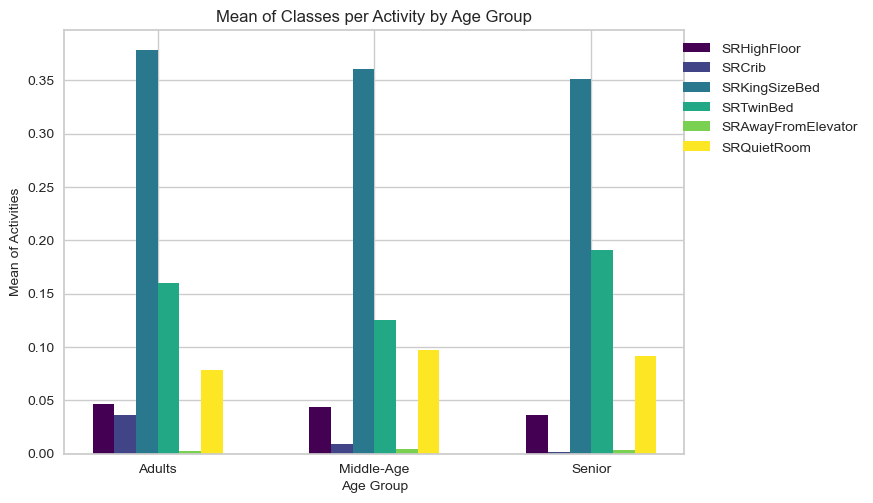

In [65]:
# Filter columns with 'Activities' in their name
requests = [col for col in data_out.columns if 'SR' in col]

bins = [0, 40, 55, 100]       # Source: United Nations (1982) - Provisional Guidelines on Standard International Age Classifications
                                     # Area E - distribution of income, consumption and accumulation with the lowest detail level
labels = ['Adults', 'Middle-Age', 'Senior']

# Create the 'AgeGroup' column
data_out['AgeGroup_vis'] = pd.cut(data_out['Age'], bins=bins, labels=labels, right=False)

# Calculate mean for each age group
means = data_out.groupby('AgeGroup_vis')[requests].mean()

# Set up colors for bars
# Set up colors for bars using a different colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(requests)))


# Plotting
fig, ax = plt.subplots()
bar_width = 0.1
bar_positions = np.arange(len(means))

for i, activity_col in enumerate(requests):
    ax.bar(
        bar_positions + i * bar_width,
        means[activity_col],
        bar_width,
        label=activity_col,
        color=colors[i],
    )

# Set up labels and title
ax.set_xticks(bar_positions + (len(requests) - 1) * bar_width / 2)
ax.set_xticklabels(means.index)
ax.set_xlabel('Age Group')
ax.set_ylabel('Mean of Activities')
ax.set_title('Mean of Classes per Activity by Age Group')

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

#Source: chatgpt

- Create bins with equal frequency for LodgingRevenue and OtherRevenue

In [66]:
bin_edges, binned_data = equal_frequency_binning(data_changes['LodgingRevenue'], 3)
print("Bin Edges:", bin_edges)
print("Binned Data:", binned_data)

# Add a new column to the DataFrame to store the bin information
data_changes['LodgingRevenueGroup'] = binned_data

# Count number of records in each bin
counts = np.bincount(binned_data)

# Print counts for each bin
for bin_num, count in enumerate(counts[1:], start=1):  # Exclude the first element which corresponds to outliers
    print(f"Bin {bin_num}: {count} records")

# Assuming the first bin starts from the lowest age
for i, edge in enumerate(bin_edges[:-1]):
    print(f"Bin {i+1}:", edge, "-", bin_edges[i+1])

#Source: chatgpt

Bin Edges: [-inf, 124.38, 345.0, inf]
Binned Data: [3 3 3 ... 2 1 3]
Bin 1: 32676 records
Bin 2: 32670 records
Bin 3: 32683 records
Bin 1: -inf - 124.38
Bin 2: 124.38 - 345.0
Bin 3: 345.0 - inf


In [67]:
bin_edges, binned_data = equal_frequency_binning(data_changes['OtherRevenue'], 3)
print("Bin Edges:", bin_edges)
print("Binned Data:", binned_data)

# Add a new column to the DataFrame to store the bin information
data_changes['OtherRevenueGroup'] = binned_data

# Count number of records in each bin
counts = np.bincount(binned_data)

# Print counts for each bin
for bin_num, count in enumerate(counts[1:], start=1):  # Exclude the first element which corresponds to outliers
    print(f"Bin {bin_num}: {count} records")

# Assuming the first bin starts from the lowest age
for i, edge in enumerate(bin_edges[:-1]):
    print(f"Bin {i+1}:", edge, "-", bin_edges[i+1])

#Source: chatgpt

Bin Edges: [-inf, 12.0, 68.0, inf]
Binned Data: [2 1 3 ... 2 1 2]
Bin 1: 32197 records
Bin 2: 32842 records
Bin 3: 32990 records
Bin 1: -inf - 12.0
Bin 2: 12.0 - 68.0
Bin 3: 68.0 - inf


In [68]:
bin_edges, binned_data = equal_frequency_binning(data_changes['AverageLeadTime'], 6)
print("Bin Edges:", bin_edges)
print("Binned Data:", binned_data)

# Add a new column to the DataFrame to store the bin information
data_changes['AvgLeadTime'] = binned_data

# Count number of records in each bin
counts = np.bincount(binned_data)

# Print counts for each bin
for bin_num, count in enumerate(counts[1:], start=1):  # Exclude the first element which corresponds to outliers
    print(f"Bin {bin_num}: {count} records")

# Assuming the first bin starts from the lowest age
for i, edge in enumerate(bin_edges[:-1]):
    print(f"Bin {i+1}:", edge, "-", bin_edges[i+1])

#Source: chatgpt

Bin Edges: [-inf, 0.0, 4.0, 28.0, 70.0, 144.0, inf]
Binned Data: [5 6 4 ... 4 2 5]
Bin 1: 0 records
Bin 2: 32291 records
Bin 3: 16296 records
Bin 4: 16496 records
Bin 5: 16491 records
Bin 6: 16455 records
Bin 1: -inf - 0.0
Bin 2: 0.0 - 4.0
Bin 3: 4.0 - 28.0
Bin 4: 28.0 - 70.0
Bin 5: 70.0 - 144.0
Bin 6: 144.0 - inf


In [69]:
data_changes = data_changes.drop(['Age', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue'], axis=1)

In [70]:
metric_features = ['TimeBetweenVisits', 'AvgLeadTime', 'CheckInRatio', 'PersonsNights', 'RoomNights']

#### Redundancy Check

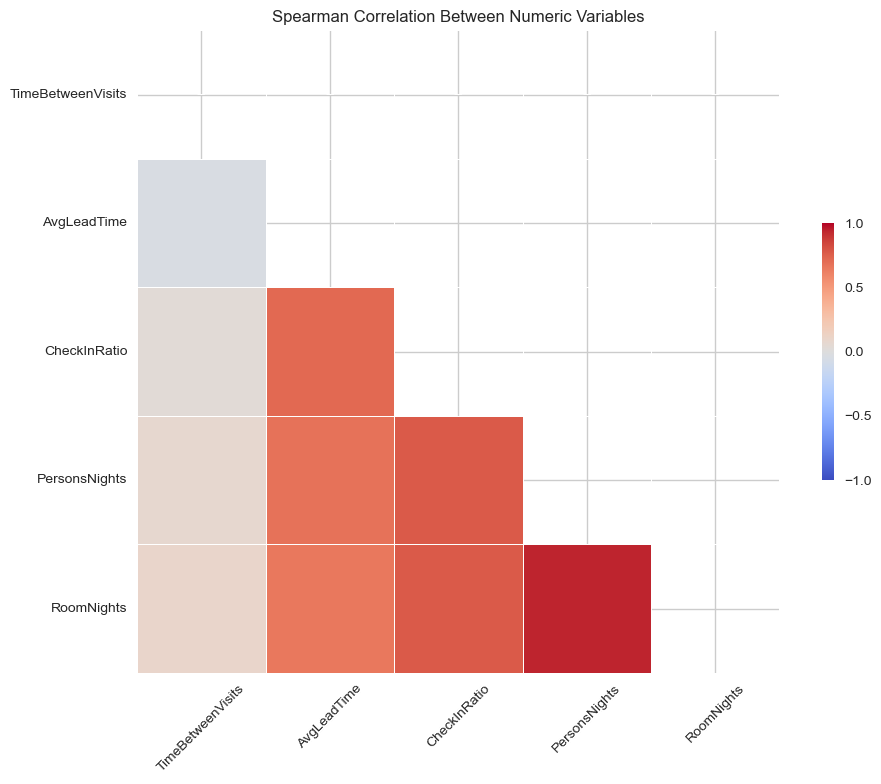

In [71]:
# Create correlation matrix
corr = data_changes[metric_features].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(corr,
                      mask=mask,
                      square=True,
                      linewidths=0.5,
                      cmap='coolwarm',
                      cbar_kws={'shrink': 0.4,
                                'ticks': [-1, -0.5, 0, 0.5, 1]},
                      annot=True,
                      fmt='.2f',
                      annot_kws={'size': 10},
                      vmin=-1,
                      vmax=1)

# Decoration
plt.title("Spearman Correlation Between Numeric Variables", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Source: chatgpt

- High correlation between RoomNights and PersonsNights: for the purpose of this analysis it is more useful to know the family/group size rather than the number of rooms booked. Besides, it is a feature frequently seen in literature. We keep PersonsNights and drop RoomNights.

In [72]:
data_changes = data_changes.drop(['RoomNights'], axis=1)

In [73]:
data_changes.head()

,DocIDHash,NameHash,DistributionChannel,PersonsNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRAwayFromElevator,SRQuietRoom,Continent,TimeBetweenVisits,CheckInRatio,AgeGroup,LodgingRevenueGroup,OtherRevenueGroup,AvgLeadTime
0,0x927C09E0F819FF5E27F0902F253267B6AFBAC4EBB553...,0xA26ECABF155F4674427682057CC5FE8ED556C9B695A6...,Travel Agent/Operator,8,1,0,1,0,0,0,North America,0,1.0,1,3,2,5
1,0xBCBC355FF42B28F7F44217873B7E62F265FF3EDB7F66...,0x9D8934AB85FCF7FB5398F623054B6E721BCF3A468AB2...,Travel Agent/Operator,6,0,0,0,1,0,0,North America,0,1.0,2,3,1,6
2,0xE8A7AF1BD451EB14FB51693FDE37BB7F9095F2612DCA...,0xA9ABDE0FE5F19A1530D969E210C6E8F293F85CA48596...,Travel Agent/Operator,12,0,0,1,0,0,0,North America,0,1.0,2,3,3,4
3,0x265ACFC3DD34E69C6BFF7CD075109699C74E6D0E9A10...,0xC9D1541AC314721018937BEB1ECBB97C13044C3B4963...,Travel Agent/Operator,0,0,0,0,0,0,0,Asia,0,0.0,1,1,1,2
4,0x4CD2668C153AD193FC6B7A5BAF7D391B97C7F12AF4EA...,0x34ED899E386382956ECAF90512C8DA2A87548A9D4947...,Travel Agent/Operator,2,0,0,0,0,0,0,Asia,0,1.0,1,2,2,3


In [74]:
# Remove columns that should not be used as they do not represent customer's characteristics or behavior
cols = ['DocIDHash', 'NameHash']
data_changes.drop(columns=cols, inplace=True)

#Source: chatgpt

In [75]:
data_changes.shape

(98029, 15)

### One-Hot Encoding 

In [76]:
data_oh = data_changes.copy()

In [77]:
data_oh.columns

Index(['DistributionChannel', 'PersonsNights', 'SRHighFloor', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRAwayFromElevator', 'SRQuietRoom',
       'Continent', 'TimeBetweenVisits', 'CheckInRatio', 'AgeGroup',
       'LodgingRevenueGroup', 'OtherRevenueGroup', 'AvgLeadTime'],
      dtype='object')

In [78]:
data_oh.head()

,DistributionChannel,PersonsNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRAwayFromElevator,SRQuietRoom,Continent,TimeBetweenVisits,CheckInRatio,AgeGroup,LodgingRevenueGroup,OtherRevenueGroup,AvgLeadTime
0,Travel Agent/Operator,8,1,0,1,0,0,0,North America,0,1.0,1,3,2,5
1,Travel Agent/Operator,6,0,0,0,1,0,0,North America,0,1.0,2,3,1,6
2,Travel Agent/Operator,12,0,0,1,0,0,0,North America,0,1.0,2,3,3,4
3,Travel Agent/Operator,0,0,0,0,0,0,0,Asia,0,0.0,1,1,1,2
4,Travel Agent/Operator,2,0,0,0,0,0,0,Asia,0,1.0,1,2,2,3


In [79]:
non_metric_features = ['DistributionChannel' , 'SRHighFloor', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRAwayFromElevator', 'SRQuietRoom', 'AgeGroup', 'LodgingRevenueGroup', 'OtherRevenueGroup', 'Continent']

In [80]:
# Encode categorical variables to dummy variables
cols = ['DistributionChannel', 'AgeGroup', 'LodgingRevenueGroup', 'OtherRevenueGroup', 'Continent']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
data_oh = ce_one_hot.fit_transform(data_oh)

#Source: professor's notebook

In [81]:
# Print all column names
for column in data_oh.columns:
    print(column)

#Source: chatgpt

DistributionChannel_Travel Agent/Operator
DistributionChannel_Direct
DistributionChannel_Corporate
DistributionChannel_GDS Systems
PersonsNights
SRHighFloor
SRCrib
SRKingSizeBed
SRTwinBed
SRAwayFromElevator
SRQuietRoom
Continent_North America
Continent_Asia
Continent_Africa
Continent_Europe
Continent_South America
Continent_Oceania
Continent_Antarctica
TimeBetweenVisits
CheckInRatio
AgeGroup_1.0
AgeGroup_2.0
AgeGroup_3.0
LodgingRevenueGroup_3.0
LodgingRevenueGroup_1.0
LodgingRevenueGroup_2.0
OtherRevenueGroup_2.0
OtherRevenueGroup_1.0
OtherRevenueGroup_3.0
AvgLeadTime


In [82]:
print(data_oh.shape)
data_oh.describe(include='all').T

(98029, 30)


,count,mean,std,min,25%,50%,75%,max
DistributionChannel_Travel Agent/Operator,98029.0,0.825052,0.379925,0.0,1.0,1.0,1.0,1.0
DistributionChannel_Direct,98029.0,0.143886,0.350976,0.0,0.0,0.0,0.0,1.0
DistributionChannel_Corporate,98029.0,0.024789,0.155481,0.0,0.0,0.0,0.0,1.0
DistributionChannel_GDS Systems,98029.0,0.006274,0.078958,0.0,0.0,0.0,0.0,1.0
PersonsNights,98029.0,4.711636,4.883753,0.0,0.0,4.0,8.0,196.0
SRHighFloor,98029.0,0.042651,0.202069,0.0,0.0,0.0,0.0,1.0
SRCrib,98029.0,0.012058,0.109144,0.0,0.0,0.0,0.0,1.0
SRKingSizeBed,98029.0,0.363545,0.481022,0.0,0.0,0.0,1.0,1.0
SRTwinBed,98029.0,0.159351,0.366005,0.0,0.0,0.0,0.0,1.0
SRAwayFromElevator,98029.0,0.003550,0.059476,0.0,0.0,0.0,0.0,1.0


- The results transformation made the modeling dataset end up with 30 columns.
- All columns are now numeric, with values in the range of 0 to 1

### Normalization

#### MinMax Scaler

In [83]:
# Get a copy of the dataframe before normalization for results' analysis
df_beforeNorm = data_oh.copy(deep=True)

In [84]:
data_minmax = data_oh.copy()

In [85]:
metric_features = ['TimeBetweenVisits', 'AvgLeadTime', 'CheckInRatio', 'PersonsNights']

In [86]:
data_minmax.columns

Index(['DistributionChannel_Travel Agent/Operator',
       'DistributionChannel_Direct', 'DistributionChannel_Corporate',
       'DistributionChannel_GDS Systems', 'PersonsNights', 'SRHighFloor',
       'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRAwayFromElevator',
       'SRQuietRoom', 'Continent_North America', 'Continent_Asia',
       'Continent_Africa', 'Continent_Europe', 'Continent_South America',
       'Continent_Oceania', 'Continent_Antarctica', 'TimeBetweenVisits',
       'CheckInRatio', 'AgeGroup_1.0', 'AgeGroup_2.0', 'AgeGroup_3.0',
       'LodgingRevenueGroup_3.0', 'LodgingRevenueGroup_1.0',
       'LodgingRevenueGroup_2.0', 'OtherRevenueGroup_2.0',
       'OtherRevenueGroup_1.0', 'OtherRevenueGroup_3.0', 'AvgLeadTime'],
      dtype='object')

In [89]:
# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
data_minmax[metric_features] = scaler.fit_transform(data_minmax[metric_features])

# Now, data_standard contains the scaled features
data_minmax

#Source: chatgpt

,DistributionChannel_Travel Agent/Operator,DistributionChannel_Direct,DistributionChannel_Corporate,DistributionChannel_GDS Systems,PersonsNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRAwayFromElevator,...,AgeGroup_1.0,AgeGroup_2.0,AgeGroup_3.0,LodgingRevenueGroup_3.0,LodgingRevenueGroup_1.0,LodgingRevenueGroup_2.0,OtherRevenueGroup_2.0,OtherRevenueGroup_1.0,OtherRevenueGroup_3.0,AvgLeadTime
0,1,0,0,0,0.040816,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0.75
1,1,0,0,0,0.030612,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1.00
2,1,0,0,0,0.061224,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0.50
3,1,0,0,0,0.000000,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0.00
4,1,0,0,0,0.010204,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104770,1,0,0,0,0.020408,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0.75
104772,0,1,0,0,0.020408,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1.00
104773,1,0,0,0,0.020408,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0.50
104774,1,0,0,0,0.000000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0.00


### Prepare dataset for segmentation

- We want to seperatly perform a priori segmentation on people who never booked or stayed at the hotel, therefore we will separate the dataset into two based on the value in BookingsCheckedIn (if there are no recorded check-ins it means the person has never stayed in the hotel).
- For the customers who have registered bookings, we will move forward do PCA and K-Means.

In [90]:
# Separate clients who did not stay at the hotel (BookingsCheckedin = 0)
clients_not_stayed = data_minmax[data_minmax['CheckInRatio'] == 0.]

# Remaining clients (who stayed at the hotel) will be in the original DataFrame
clients_stayed = data_minmax[data_minmax['CheckInRatio'] != 0.]

#Source: chatgpt

## PCA - dimensionality reduction

- PCA aims to reduce the dimensionality of a dataset while preserving as much variance as possible.

In [91]:
ds_pca = clients_stayed.copy()

In [92]:
ds_pca.shape

(72391, 30)

In [93]:
print(ds_pca.isnull().sum())

DistributionChannel_Travel Agent/Operator    0
DistributionChannel_Direct                   0
DistributionChannel_Corporate                0
DistributionChannel_GDS Systems              0
PersonsNights                                0
SRHighFloor                                  0
SRCrib                                       0
SRKingSizeBed                                0
SRTwinBed                                    0
SRAwayFromElevator                           0
SRQuietRoom                                  0
Continent_North America                      0
Continent_Asia                               0
Continent_Africa                             0
Continent_Europe                             0
Continent_South America                      0
Continent_Oceania                            0
Continent_Antarctica                         0
TimeBetweenVisits                            0
CheckInRatio                                 0
AgeGroup_1.0                                 0
AgeGroup_2.0 

In [94]:
# Use PCA to reduce dimensionality of data
pca = PCA().fit(ds_pca) 

# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

#Source: previous project notebook

,Eigenvalue,Difference,Proportion,Cumulative
1,5.893013e-01,0.000000e+00,1.955987e-01,0.195599
2,3.952215e-01,-1.940797e-01,1.311805e-01,0.326779
3,3.297816e-01,-6.543995e-02,1.094599e-01,0.436239
4,2.878704e-01,-4.191116e-02,9.554887e-02,0.531788
5,2.789964e-01,-8.874050e-03,9.260343e-02,0.624391
6,2.276838e-01,-5.131260e-02,7.557195e-02,0.699963
7,1.816007e-01,-4.608310e-02,6.027622e-02,0.760239
8,1.646596e-01,-1.694104e-02,5.465321e-02,0.814893
9,9.992177e-02,-6.473787e-02,3.316566e-02,0.848058
10,8.430423e-02,-1.561754e-02,2.798194e-02,0.876040


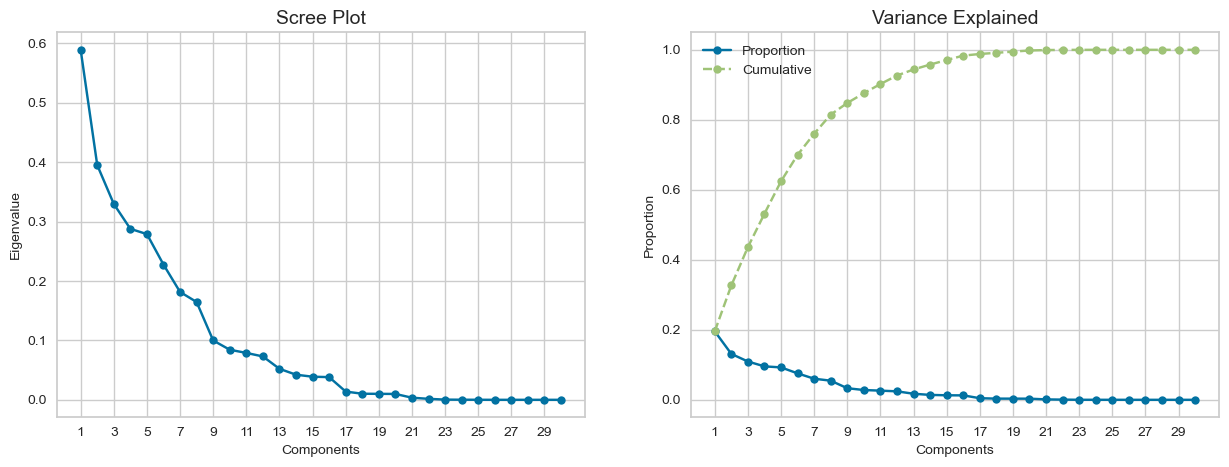

In [95]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

#Source: previous project notebook

- Rule of thumb: with 8 components we keep around 80% of the total variance and looking at the elbow of the scree plot it suggests we should keep 9 components, so we proceed k-means modelling with 9 components

### K-Means modelling with 9 components

In [96]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [97]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=9)
pca_feat = pca.fit_transform(ds_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_ds = pd.DataFrame(pca_feat, index=ds_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_ds.head()

#Source: previous project notebook

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.048297,-0.620510,1.187239,0.252348,-0.672380,0.320633,0.459337,-0.905580,0.073740
1,0.474030,-0.541136,-0.390761,0.283828,0.048281,-0.394347,1.440957,-0.431668,0.699419
2,1.036429,-0.393642,-0.407356,-0.016163,-0.711024,0.516446,0.700380,-0.785716,-0.098196
4,-1.120076,-0.068385,0.611802,-0.367813,0.093870,-0.130219,0.562452,-0.751539,-0.458781
5,-0.074637,0.429740,0.430230,-1.150366,-0.401778,0.639529,0.531143,-0.678934,-0.229879


In [98]:
# Kmeans algorithm settings
kmeans_set = {"init":'k-means++', "max_iter":300, "random_state":123}

inertias = []
silhouette_coefficients = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)   
    kmeans.fit(pca_feat)
    inertias.append(kmeans.inertia_)
    score=silhouette_score(pca_feat, kmeans.labels_)
    silhouette_coefficients.append(score)

#Source: previous project notebook

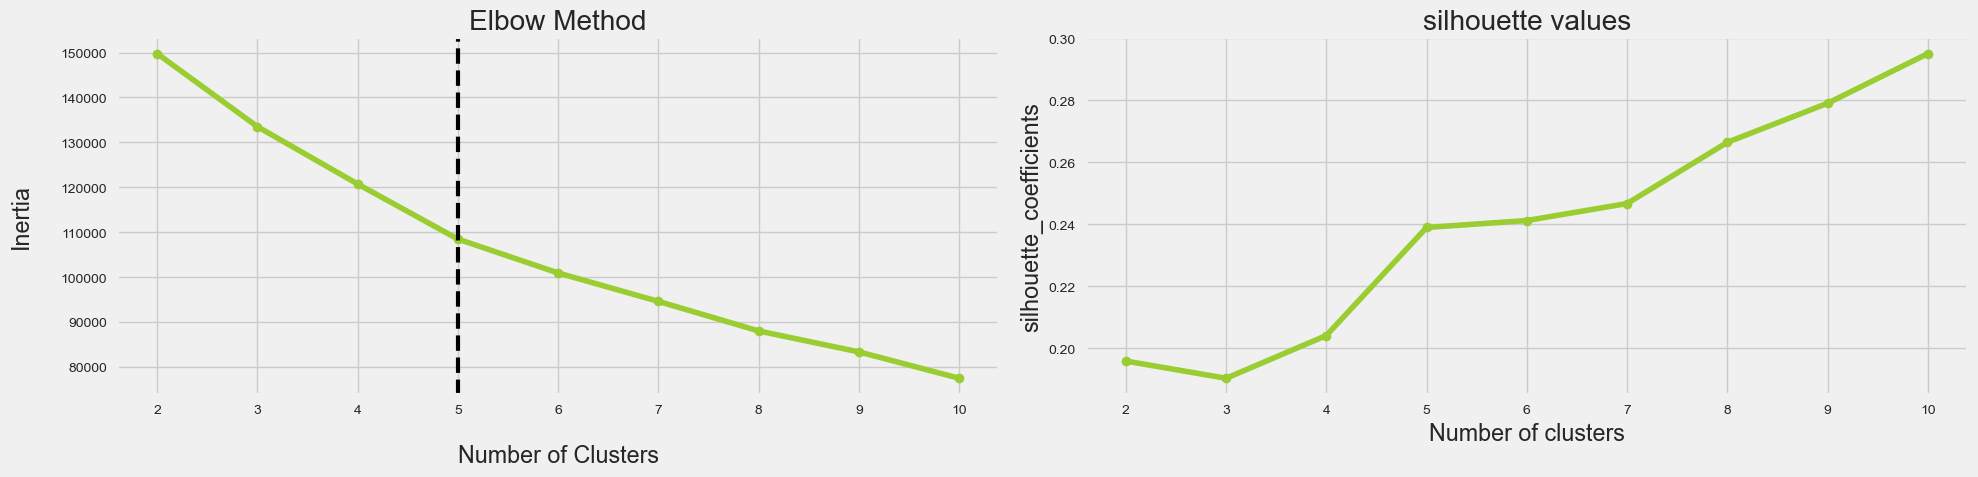

In [99]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(1,2,figsize=(20,5))
kl = KneeLocator(range(2,11), inertias, curve='convex', direction="decreasing")
ax[0].plot(range(2,11), inertias,color='yellowgreen',marker='o',label='Elbow Method')
ax[0].set_xticks(range(2,11))
ax[0].set_xlabel("Number of Clusters", labelpad=20)
ax[0].set_ylabel("Inertia", labelpad=20)
ax[0].set_title("Elbow Method")
ax[0].axvline(x=kl.elbow, color='black', label='axvline-fullheight', ls='--', linewidth=3)

ax[1].plot(range(2,11), silhouette_coefficients,color='yellowgreen',marker='o',label='silhouette coefficients')
ax[1].set_xticks(range(2,11))
ax[1].set_title("silhouette values")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("silhouette_coefficients")
plt.tight_layout()

#Source: previous project notebook

- Elbow method indicates optimal K: K = 5

In [100]:
# Apply the K-Means for K=5
K=5
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(pca_feat)
y_kmeans = kmeans.predict(pca_feat)

#Source: previous project notebook

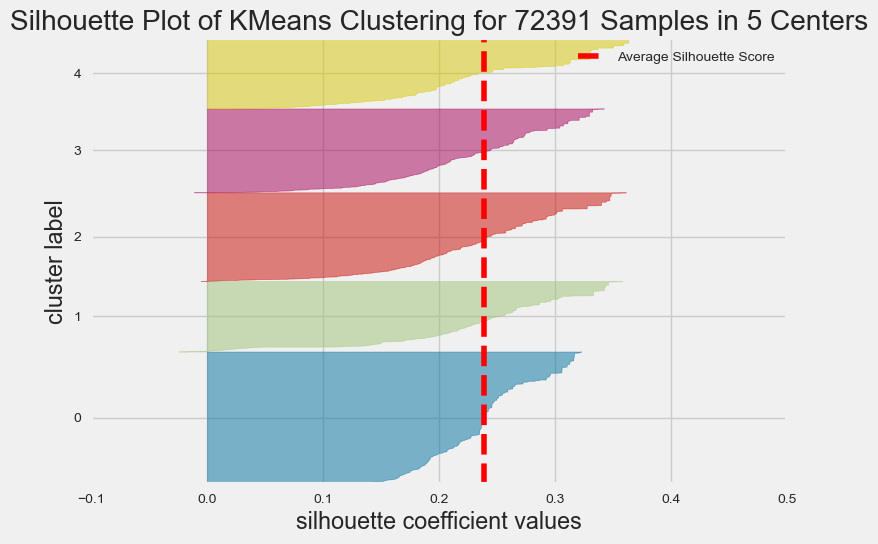

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 72391 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [101]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_feat)
visualizer.show()

#Source: professor's notebook

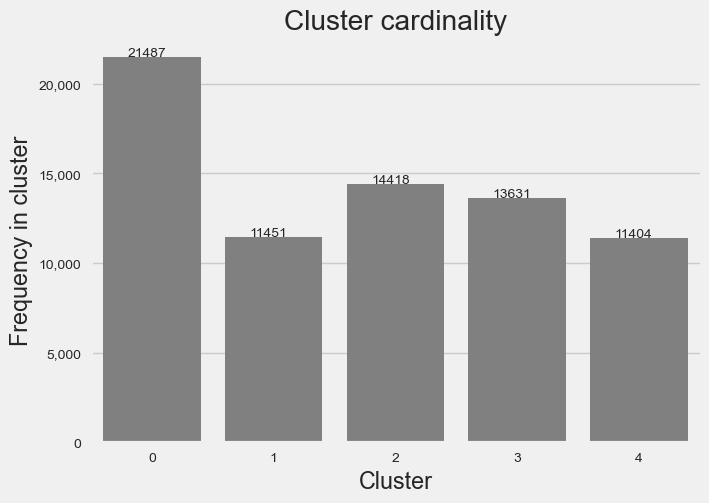

In [102]:
# Plot clusters cardinality 

# Count observations per cluster
freqByCluster = clients_stayed.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index, data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=10))  # Adjust fontsize as needed
sns.despine()
plt.title("Cluster cardinality")
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.show()

#Source: professor's notebook

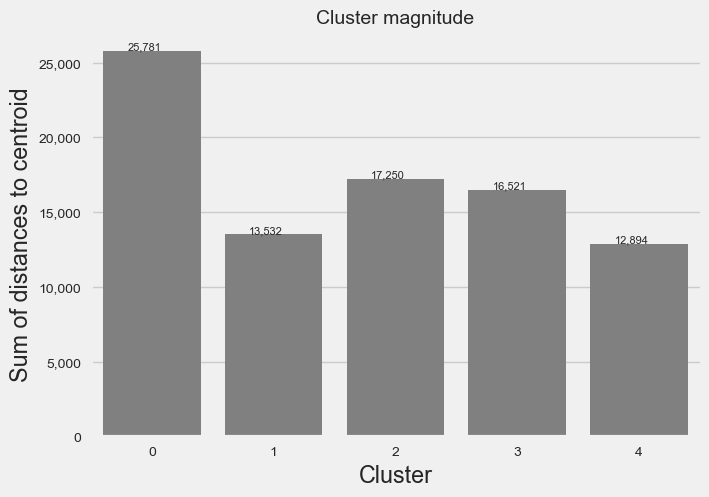

In [103]:
# Plot clusters magnitude

# Compute Magnitude
ds_pca['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = ds_pca['distanceToCentroid'].groupby(y_kmeans).sum()
ds_pca = ds_pca.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

#Source: professor's notebook

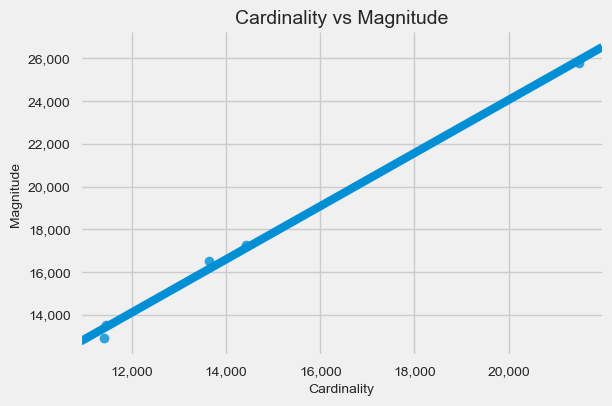

In [104]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

#Source: professor's notebook

- Cardinality is correlated to magnitude, therefore no major anomalies seems to exist in clusters.

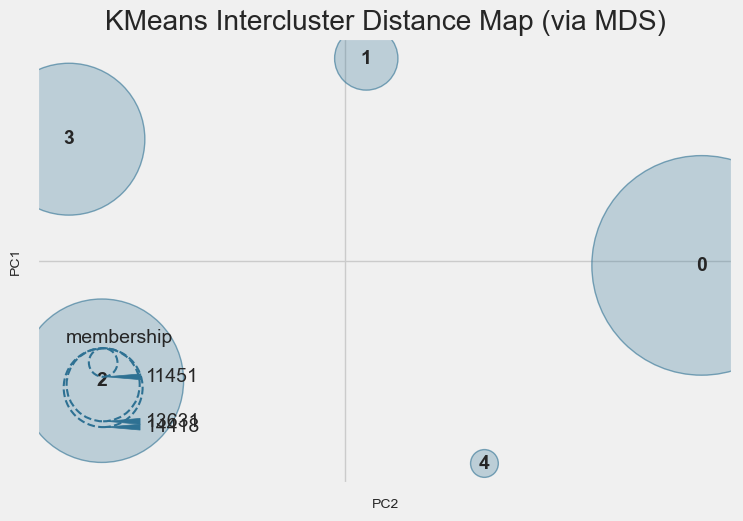

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [105]:
# Visualizing the clusters sizes and distances in 2D
from yellowbrick.cluster import InterclusterDistance
visualizer = InterclusterDistance(kmeans)
visualizer.fit(pca_feat)
visualizer.show()

#Source: professor's notebook

Circles represent the clusters (0 to 4). Even at two dimensions it is possible to see that although the two components only represent around 33% of the variance, some distance between clusters seems to exist.

In [106]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=ds_pca.columns)
wheightsDF

#Source: professor's notebook

,DistributionChannel_Travel Agent/Operator,DistributionChannel_Direct,DistributionChannel_Corporate,DistributionChannel_GDS Systems,PersonsNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRAwayFromElevator,...,AgeGroup_1.0,AgeGroup_2.0,AgeGroup_3.0,LodgingRevenueGroup_3.0,LodgingRevenueGroup_1.0,LodgingRevenueGroup_2.0,OtherRevenueGroup_2.0,OtherRevenueGroup_1.0,OtherRevenueGroup_3.0,AvgLeadTime
0,-0.002766,0.015954,-0.009401,-0.003788,0.016939,0.008779,0.003102,0.052593,0.017312,0.001686,...,-0.072601,0.028232,0.044368,0.510325,-0.058375,-0.451950,-0.486018,-0.038785,0.524804,0.073979
1,0.163207,-0.129022,-0.025321,-0.008864,-0.000890,-0.007808,-0.006402,-0.003012,0.080866,-0.000397,...,-0.153744,-0.435829,0.589573,-0.284820,-0.081179,0.365998,-0.256976,-0.022003,0.278979,0.139164
2,0.049552,-0.034973,-0.013010,-0.001568,0.000340,0.010948,0.008481,0.121451,-0.011362,-0.000062,...,0.615079,-0.665542,0.050463,0.207816,0.037787,-0.245603,0.152216,0.005533,-0.157749,-0.027728
3,-0.034153,0.027502,0.007390,-0.000739,-0.000146,-0.004339,-0.013329,-0.056196,0.005473,0.001053,...,-0.486644,-0.033140,0.519784,0.286919,0.053692,-0.340610,0.404796,-0.095057,-0.309739,0.047270
4,-0.519676,0.441663,0.063465,0.014547,-0.002533,-0.025876,0.001185,-0.659345,0.150864,-0.000322,...,0.076625,-0.151617,0.074991,-0.054715,0.063110,-0.008394,-0.092189,0.043461,0.048728,-0.091427
5,-0.422374,0.374261,0.037030,0.011083,-0.003488,0.021138,0.008392,0.586230,-0.374337,0.002325,...,-0.073994,-0.040596,0.114590,-0.143109,0.130400,0.012709,-0.138972,0.140213,-0.001241,-0.183574
6,0.203056,-0.213982,0.005966,0.004960,-0.009320,-0.015522,-0.004175,-0.184924,0.166147,-0.002180,...,-0.013445,0.058365,-0.044921,-0.155023,0.350501,-0.195478,-0.232341,0.346750,-0.114409,-0.143874
7,0.079153,-0.110178,0.021481,0.009544,-0.011198,-0.011534,-0.007946,-0.008221,-0.117750,-0.000569,...,-0.076158,-0.048769,0.124927,-0.174369,0.418558,-0.244189,-0.208524,0.370626,-0.162102,-0.138988
8,-0.134760,0.188120,-0.044770,-0.008590,-0.002216,0.076101,-0.004112,0.360166,0.822579,0.005874,...,-0.008600,0.026805,-0.018205,-0.040640,0.058630,-0.017990,-0.024247,0.125272,-0.101025,0.217673


In [107]:
# Study the weights of component 9
comp = abs(wheightsDF.iloc[8])  ## index 10 is component 9
comp = comp.sort_values(ascending=False)
comp

#Source: professor's notebook

SRTwinBed                                    0.822579
SRKingSizeBed                                0.360166
AvgLeadTime                                  0.217673
SRQuietRoom                                  0.207825
DistributionChannel_Direct                   0.188120
DistributionChannel_Travel Agent/Operator    0.134760
OtherRevenueGroup_1.0                        0.125272
OtherRevenueGroup_3.0                        0.101025
Continent_Europe                             0.082230
SRHighFloor                                  0.076101
LodgingRevenueGroup_1.0                      0.058630
DistributionChannel_Corporate                0.044770
LodgingRevenueGroup_3.0                      0.040640
Continent_South America                      0.030633
AgeGroup_2.0                                 0.026805
OtherRevenueGroup_2.0                        0.024247
Continent_Asia                               0.021526
AgeGroup_3.0                                 0.018205
LodgingRevenueGroup_2.0     

#### Interpret clusters results

In [108]:
# Check the mean values of each cluster for top 30 relevant features
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(clients_stayed[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose() 

#Source: professor's notebook

,0,1,2,3,4
SRTwinBed,0.150184,0.122871,0.113885,0.135353,0.215889
SRKingSizeBed,0.392889,0.338311,0.318699,0.362629,0.332866
AvgLeadTime,0.624587,0.577024,0.484395,0.474287,0.672330
SRQuietRoom,0.121748,0.090909,0.080108,0.064192,0.051999
DistributionChannel_Direct,0.168288,0.125579,0.147246,0.135867,0.079972
DistributionChannel_Travel Agent/Operator,0.805743,0.837394,0.785823,0.820703,0.899860
OtherRevenueGroup_1.0,0.001629,0.129159,0.164378,0.193529,0.003244
OtherRevenueGroup_3.0,0.998371,0.000873,0.003399,0.008217,0.996756
Continent_Europe,0.842323,0.777050,0.853378,0.834201,0.862154
SRHighFloor,0.052218,0.036241,0.037800,0.043064,0.029200


-----

In [109]:
clients_not_stayed.head()

,DistributionChannel_Travel Agent/Operator,DistributionChannel_Direct,DistributionChannel_Corporate,DistributionChannel_GDS Systems,PersonsNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRAwayFromElevator,...,AgeGroup_1.0,AgeGroup_2.0,AgeGroup_3.0,LodgingRevenueGroup_3.0,LodgingRevenueGroup_1.0,LodgingRevenueGroup_2.0,OtherRevenueGroup_2.0,OtherRevenueGroup_1.0,OtherRevenueGroup_3.0,AvgLeadTime
3,1,0,0,0,0.0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0.0
12,0,1,0,0,0.0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0.0
17,1,0,0,0,0.0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0.0
31,0,1,0,0,0.0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0.0
37,1,0,0,0,0.0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0.0


In [110]:
clients_not_stayed.columns

Index(['DistributionChannel_Travel Agent/Operator',
       'DistributionChannel_Direct', 'DistributionChannel_Corporate',
       'DistributionChannel_GDS Systems', 'PersonsNights', 'SRHighFloor',
       'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRAwayFromElevator',
       'SRQuietRoom', 'Continent_North America', 'Continent_Asia',
       'Continent_Africa', 'Continent_Europe', 'Continent_South America',
       'Continent_Oceania', 'Continent_Antarctica', 'TimeBetweenVisits',
       'CheckInRatio', 'AgeGroup_1.0', 'AgeGroup_2.0', 'AgeGroup_3.0',
       'LodgingRevenueGroup_3.0', 'LodgingRevenueGroup_1.0',
       'LodgingRevenueGroup_2.0', 'OtherRevenueGroup_2.0',
       'OtherRevenueGroup_1.0', 'OtherRevenueGroup_3.0', 'AvgLeadTime'],
      dtype='object')

In [112]:
clients_not_stayed = clients_not_stayed.drop([ 'PersonsNights', 'SRHighFloor','SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRAwayFromElevator','SRQuietRoom',
                                              'LodgingRevenueGroup_3.0', 'LodgingRevenueGroup_1.0', 'LodgingRevenueGroup_2.0', 'CheckInRatio'], axis=1)

In [113]:
# Calculate the mode of each column
mode_values = clients_not_stayed.mode()

# Create a new DataFrame 'clients_no_stay' with the mode values
clients_no_stay = pd.DataFrame(mode_values, columns=clients_not_stayed.columns)

# Print or return 'clients_no_stay'
clients_no_stay.T

#Source: chatgpt

,0
DistributionChannel_Travel Agent/Operator,1.0
DistributionChannel_Direct,0.0
DistributionChannel_Corporate,0.0
DistributionChannel_GDS Systems,0.0
Continent_North America,0.0
Continent_Asia,0.0
Continent_Africa,0.0
Continent_Europe,1.0
Continent_South America,0.0
Continent_Oceania,0.0


--------------

Cluster 0:
- Youth group [0, 40] 
-  Mostly European but with the highest number of Asian and African customers 
- Average spending regarding lodging [124.38€ - 345.0€] and in hotel facilities [12.0€ - 68.0€]. The last one considered low  
- Most clients use a travel agent/ operator to book a service 

Cluster 1:
- Cover all age groups equally 
- Biggest expending costumer both in lodging (more than 245€)as well as other spending (more than 68€)
- Most clients are from Europe 
- Group with the highest number of direct reservations compared to other clusters 
-Tend to prefer quiet rooms with a king-size bed and/or crib, in a hight floor. We can assume that some of them are families

Cluster 2:
- Age experienced group [55, 100] 
- Average spending regarding lodging and hotel facilities 
- Most clients use a travel agent/ operator to book a service 
- Mostly European but with the highest number North and South Americans customers 
- Tend to prefer rooms away from the elevator 

Cluster 3:
- Mostly age experienced group [55, 100] 
- Average spending regarding lodging but hight spending in hotel facilities 
- Most clients are from Europe 
- Most clients use a travel agent/ operator to book a service 
- Costumers made reservations with more advanced notice compared to the others 
- Tend to prefer rooms with twin beds 

Cluster 4:
- Age group [40, 55] years old 
- Mainly Europeans, but with the largest population originating from Oceania 
- Average spending regarding lodging and hotel facilities 
- Most clients use a travel agent/ operator to book a service 
- Group with the highest number of reservations made through the corporate and GDS compared to other clusters 

CLuster 5:
- Cover all age groups equally 
- Most clients are from Europe 
- Most clients represent low revenue to the hotel (12€ or less) 
- Most clients use a travel agent/ operator to book a service 
- Most clients book the experience as they arrive 
- Most clients only used the service oncee
y used the service once 

